In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install sklearn
!pip install pmdarima
!pip install pickle
!pip install xgboost
!pip install scipy==1.7.1
!pip install joblib==1.0.1
!pip install tensorflow

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
ERROR: Ignored the following yanked versions: 1.11.0, 1.1

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


import pickle
from os import path

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

## Data Loading

In [3]:
df = pd.read_excel('/content/data train - house price prediction.xlsx')
df

,title,location,Kecamatan,Kota,KT,LT,LB,price
0,Citra Garden Serpong,"Cisauk, Kab. Tangerang",Cisauk,Kab. Tangerang,4,150,190,4400000000
1,Matera Residence,"Pagedangan, Kab. Tangerang",Pagedangan,Kab. Tangerang,4,462,439,19000000000
2,Serpong Garden 3,"Cisauk, Kab. Tangerang",Cisauk,Kab. Tangerang,3,79,54,1900000000
3,Serpong Grand Park,"Serpong Utara, Kota Tangerang Selatan",Serpong Utara,Kota Tangerang Selatan,3,179,54,11400000000
4,Golden Park 2 Serpong,"Cisauk, Kab. Tangerang",Cisauk,Kab. Tangerang,3,183,92,3100000000
...,...,...,...,...,...,...,...,...
1033,Dijual Rumah Hoek Lebih Tanah Samping Residenc...,"Serpong, Kota Tangerang Selatan",Serpong,Kota Tangerang Selatan,3,300,153,4800000000
1034,Dijual Rumah Rumah Minimalis 2 Lantai Terawat ...,"Serpong, Kota Tangerang Selatan",Serpong,Kota Tangerang Selatan,3,96,93,1500000000
1035,Dijual Rumah 3lantai Siap Huni Kondisi Baru Fu...,"Pagedangan, Kab. Tangerang",Pagedangan,Kab. Tangerang,3,35,103,1900000000
1036,"Dijual Rumah Semi Furnished Dan Rooftop, Dekat...","Serpong, Kota Tangerang Selatan",Serpong,Kota Tangerang Selatan,4,140,180,1900000000


## EDA

In [4]:
df.describe()

,KT,LT,LB,price
count,1038.000000,1038.000000,1038.000000,1.038000e+03
mean,3.506744,148.987476,157.317919,2.861273e+09
std,1.697310,130.623853,136.170659,3.129199e+09
min,1.000000,30.000000,20.000000,5.500000e+07
25%,3.000000,72.250000,72.000000,1.200000e+09
50%,3.000000,105.000000,120.000000,1.900000e+09
75%,4.000000,175.500000,196.000000,3.400000e+09
max,27.000000,1500.000000,1046.000000,3.550000e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1038 non-null   object
 1   location   1038 non-null   object
 2   Kecamatan  1038 non-null   object
 3   Kota       1038 non-null   object
 4   KT         1038 non-null   int64 
 5   LT         1038 non-null   int64 
 6   LB         1038 non-null   int64 
 7   price      1038 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 65.0+ KB


In [6]:
df_null = (df.isnull().sum())
df_null

,0
title,0
location,0
Kecamatan,0
Kota,0
KT,0
LT,0
LB,0
price,0


In [7]:
# Hitung rata-rata harga per Kecamatan
average_price = df.groupby("Kecamatan")["price"].mean()

# Tampilkan hasil
print(average_price)

Kecamatan
Cisauk           1.797975e+09
Pagedangan       3.824543e+09
Serpong          2.609564e+09
Serpong Utara    2.913697e+09
Name: price, dtype: float64


In [8]:
# Hitung rata-rata harga per y
average_KT = df.groupby("KT")["price"].mean()

# Tampilkan hasil
print(average_KT)

KT
1     1.666667e+09
2     9.929943e+08
3     2.037180e+09
4     3.623057e+09
5     5.371200e+09
6     6.441667e+09
7     8.455556e+09
8     1.065000e+10
10    2.700000e+09
12    1.012500e+10
14    2.500000e+09
18    7.800000e+09
19    6.000000e+09
27    8.000000e+09
Name: price, dtype: float64


In [9]:
# Hitung rata-rata harga per z
average_kota = df.groupby("Kota")["price"].mean()

# Tampilkan hasil
print(average_kota)

Kota
Kab. Tangerang            3.283669e+09
Kota Tangerang Selatan    2.692770e+09
Name: price, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

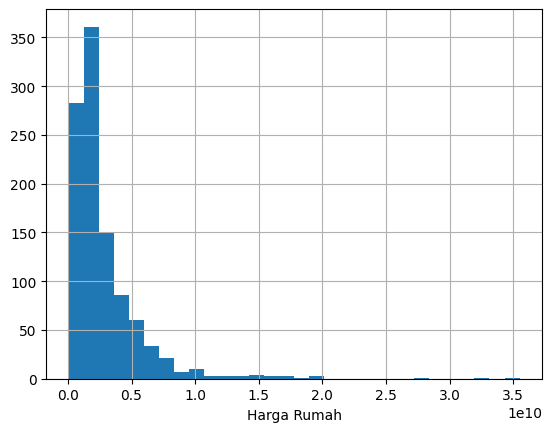

In [11]:
df['price'].hist(bins=30)
plt.xlabel('Harga Rumah')
plt.show()

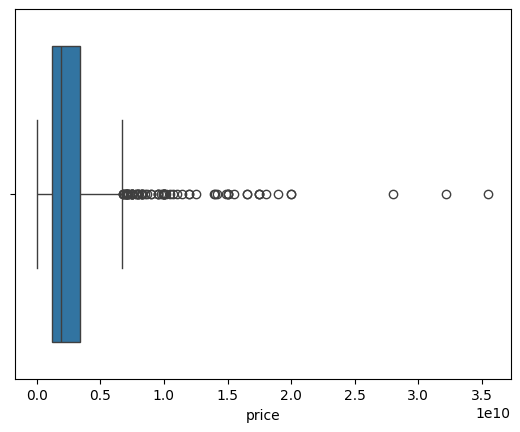

In [12]:
sns.boxplot(x=df['price'])
plt.show()

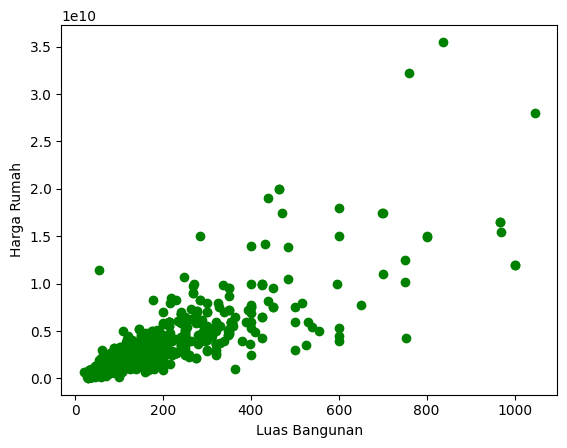

In [13]:
plt.scatter(df['LB'], df['price'], color='green')
plt.xlabel('Luas Bangunan')
plt.ylabel('Harga Rumah')
plt.show()

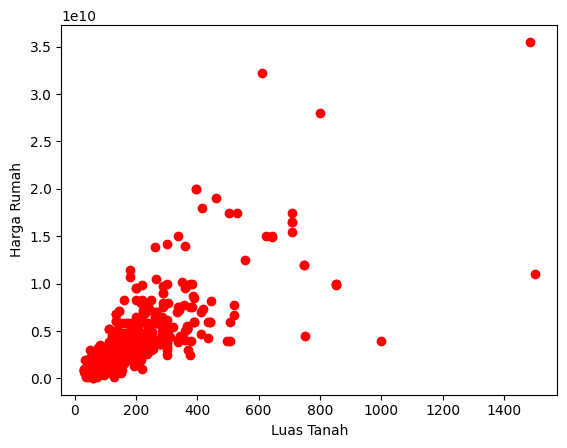

In [14]:
plt.scatter(df['LT'], df['price'], color='red')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga Rumah')
plt.show()

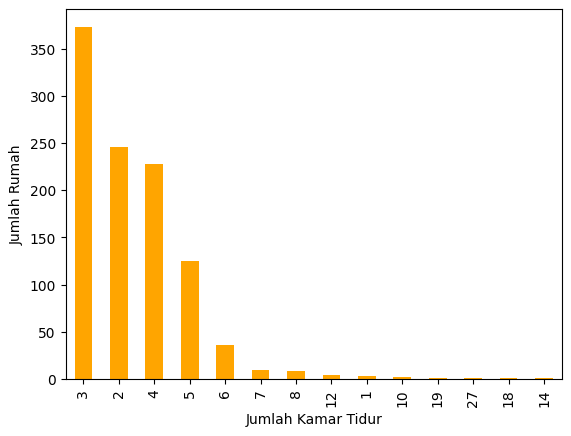

In [15]:
df['KT'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Jumlah Rumah')
plt.show()

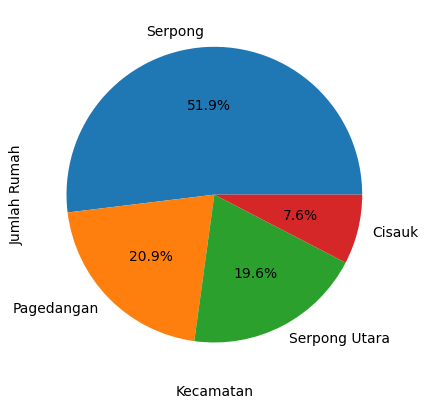

Jumlah dan Persentase Rumah per Kecamatan:
Serpong: 539 rumah (51.9%)
Pagedangan: 217 rumah (20.9%)
Serpong Utara: 203 rumah (19.6%)
Cisauk: 79 rumah (7.6%)


In [16]:
df['Kecamatan'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Rumah')
plt.show()

counts = df['Kecamatan'].value_counts()
percentages = df['Kecamatan'].value_counts(normalize=True) * 100
print("Jumlah dan Persentase Rumah per Kecamatan:")
for kota in counts.index:
    print(f"{kota}: {counts[kota]} rumah ({percentages[kota]:.1f}%)")

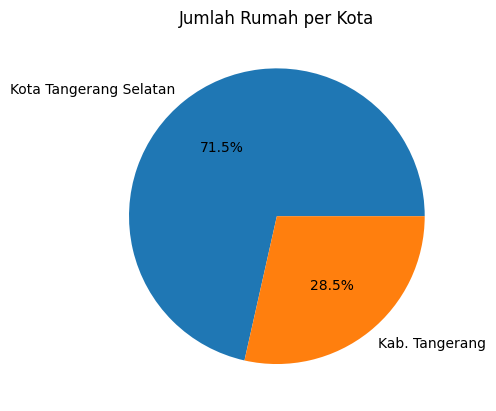

Jumlah dan Persentase Rumah per Kota:
Kota Tangerang Selatan: 742 rumah (71.5%)
Kab. Tangerang: 296 rumah (28.5%)


In [17]:
df['Kota'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Jumlah Rumah per Kota')
plt.ylabel('')
plt.show()


counts = df['Kota'].value_counts()
percentages = df['Kota'].value_counts(normalize=True) * 100
print("Jumlah dan Persentase Rumah per Kota:")
for kota in counts.index:
    print(f"{kota}: {counts[kota]} rumah ({percentages[kota]:.1f}%)")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1038 non-null   object
 1   location   1038 non-null   object
 2   Kecamatan  1038 non-null   object
 3   Kota       1038 non-null   object
 4   KT         1038 non-null   int64 
 5   LT         1038 non-null   int64 
 6   LB         1038 non-null   int64 
 7   price      1038 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 65.0+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KT,1038.0,3.506744e+00,1.697310e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
LT,1038.0,1.489875e+02,1.306239e+02,30.0,7.225000e+01,1.050000e+02,1.755000e+02,1.500000e+03
LB,1038.0,1.573179e+02,1.361707e+02,20.0,7.200000e+01,1.200000e+02,1.960000e+02,1.046000e+03
price,1038.0,2.861273e+09,3.129199e+09,55000000.0,1.200000e+09,1.900000e+09,3.400000e+09,3.550000e+10


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

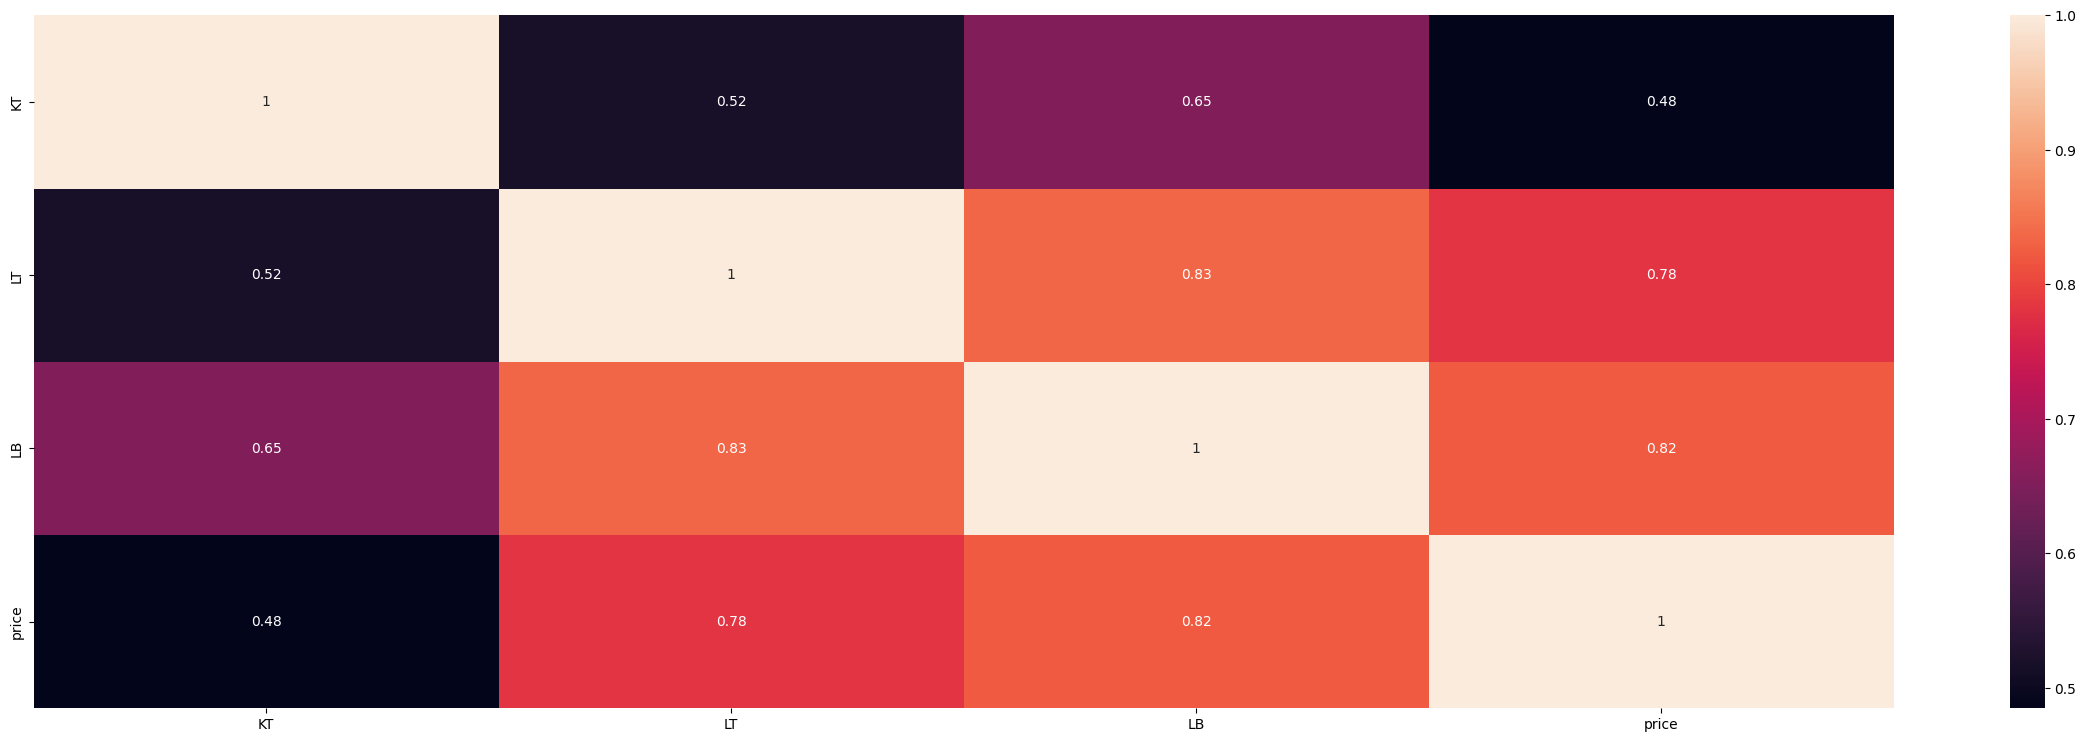

In [21]:
plt.figure(figsize=(30,9))

# Convert relevant columns to numeric type before calculating correlation
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns

sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## Data PreProcessing

### Implementasi Label Encoder

In [22]:
df_le = df.copy()
df_le = df_le[['Kecamatan','Kota', 'KT', 'LT','LB','price']]
df_le

,Kecamatan,Kota,KT,LT,LB,price
0,Cisauk,Kab. Tangerang,4,150,190,4400000000
1,Pagedangan,Kab. Tangerang,4,462,439,19000000000
2,Cisauk,Kab. Tangerang,3,79,54,1900000000
3,Serpong Utara,Kota Tangerang Selatan,3,179,54,11400000000
4,Cisauk,Kab. Tangerang,3,183,92,3100000000
...,...,...,...,...,...,...
1033,Serpong,Kota Tangerang Selatan,3,300,153,4800000000
1034,Serpong,Kota Tangerang Selatan,3,96,93,1500000000
1035,Pagedangan,Kab. Tangerang,3,35,103,1900000000
1036,Serpong,Kota Tangerang Selatan,4,140,180,1900000000


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_le['Kecamatan'] = le.fit_transform(df_le['Kecamatan'])

In [24]:
le2 = preprocessing.LabelEncoder()
df_le['Kota'] = le2.fit_transform(df_le['Kota'])

In [25]:
df_le.head()
#Apartemen = 0, rumah = 1, ruko = 2, tanah = 3

,Kecamatan,Kota,KT,LT,LB,price
0,0,0,4,150,190,4400000000
1,1,0,4,462,439,19000000000
2,0,0,3,79,54,1900000000
3,3,1,3,179,54,11400000000
4,0,0,3,183,92,3100000000


In [26]:
# Menyimpan objek RobustScaler
with open('labelkec.pkl', 'wb') as file:
    pickle.dump(le, file)

with open('labelkota.pkl', 'wb') as file:
    pickle.dump(le2, file)

In [27]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Kecamatan  1038 non-null   int64
 1   Kota       1038 non-null   int64
 2   KT         1038 non-null   int64
 3   LT         1038 non-null   int64
 4   LB         1038 non-null   int64
 5   price      1038 non-null   int64
dtypes: int64(6)
memory usage: 48.8 KB


In [28]:
df_mx = df_le.copy()
df_sc = df_le.copy()
df_rb = df_le.copy()

In [29]:
scaler = MinMaxScaler()
df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']])
df_mx

,Kecamatan,Kota,KT,LT,LB,price
0,0.000000,0.0,0.115385,0.081633,0.165692,0.122584
1,0.333333,0.0,0.115385,0.293878,0.408382,0.534490
2,0.000000,0.0,0.076923,0.033333,0.033138,0.052052
3,1.000000,1.0,0.076923,0.101361,0.033138,0.320073
4,0.000000,0.0,0.076923,0.104082,0.070175,0.085908
...,...,...,...,...,...,...
1033,0.666667,1.0,0.076923,0.183673,0.129630,0.133869
1034,0.666667,1.0,0.076923,0.044898,0.071150,0.040767
1035,0.333333,0.0,0.076923,0.003401,0.080897,0.052052
1036,0.666667,1.0,0.115385,0.074830,0.155945,0.052052


In [30]:
scaler = StandardScaler()
df_sc[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_sc[['Kecamatan','Kota', 'KT', 'LT','LB','price']])
df_sc

,Kecamatan,Kota,KT,LT,LB,price
0,-2.221802,-1.583274,0.290751,0.007755,0.240124,0.491969
1,-1.010546,-1.583274,0.290751,2.397444,2.069593,5.159949
2,-2.221802,-1.583274,-0.298701,-0.536052,-0.759104,-0.307343
3,1.411964,0.631603,-0.298701,0.229874,-0.759104,2.730042
4,-2.221802,-1.583274,-0.298701,0.260511,-0.479908,0.076327
...,...,...,...,...,...,...
1033,0.200709,0.631603,-0.298701,1.156644,-0.031725,0.619859
1034,0.200709,0.631603,-0.298701,-0.405845,-0.472561,-0.435233
1035,-1.010546,-1.583274,-0.298701,-0.873060,-0.399088,-0.307343
1036,0.200709,0.631603,0.290751,-0.068837,0.166651,-0.307343


In [31]:
scaler = RobustScaler()
df_rb[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_rb[['Kecamatan','Kota', 'KT', 'LT','LB','price']])
df_rb

,Kecamatan,Kota,KT,LT,LB,price
0,-2.0,-1.0,1.0,0.435835,0.564516,1.136364
1,-1.0,-1.0,1.0,3.457627,2.572581,7.772727
2,-2.0,-1.0,0.0,-0.251816,-0.532258,0.000000
3,1.0,0.0,0.0,0.716707,-0.532258,4.318182
4,-2.0,-1.0,0.0,0.755448,-0.225806,0.545455
...,...,...,...,...,...,...
1033,0.0,0.0,0.0,1.888620,0.266129,1.318182
1034,0.0,0.0,0.0,-0.087167,-0.217742,-0.181818
1035,-1.0,-1.0,0.0,-0.677966,-0.137097,0.000000
1036,0.0,0.0,1.0,0.338983,0.483871,0.000000


In [32]:
rb_convert = df_le.copy()
scaler = RobustScaler()
rb_convert[['Kecamatan','Kota', 'KT', 'LT','LB']] = scaler.fit_transform(rb_convert[['Kecamatan','Kota', 'KT', 'LT','LB']])
rb_convert

,Kecamatan,Kota,KT,LT,LB,price
0,-2.0,-1.0,1.0,0.435835,0.564516,4400000000
1,-1.0,-1.0,1.0,3.457627,2.572581,19000000000
2,-2.0,-1.0,0.0,-0.251816,-0.532258,1900000000
3,1.0,0.0,0.0,0.716707,-0.532258,11400000000
4,-2.0,-1.0,0.0,0.755448,-0.225806,3100000000
...,...,...,...,...,...,...
1033,0.0,0.0,0.0,1.888620,0.266129,4800000000
1034,0.0,0.0,0.0,-0.087167,-0.217742,1500000000
1035,-1.0,-1.0,0.0,-0.677966,-0.137097,1900000000
1036,0.0,0.0,1.0,0.338983,0.483871,1900000000


In [33]:
# # Menyimpan objek RobustScaler
# with open('robust_scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

## Implementasi Min-Max Scaler

### Modeling

In [34]:
X1 = df_mx.drop('price',axis=1)
Y1 = df_mx['price']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1, test_size=0.2)

#### Linear Regression

In [36]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [37]:
lr_acc1 = lr1.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc1)

Linear Regressor Accuracy -  72.69579771908437


In [38]:
# y_pred = lr.predict(X_test)

# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

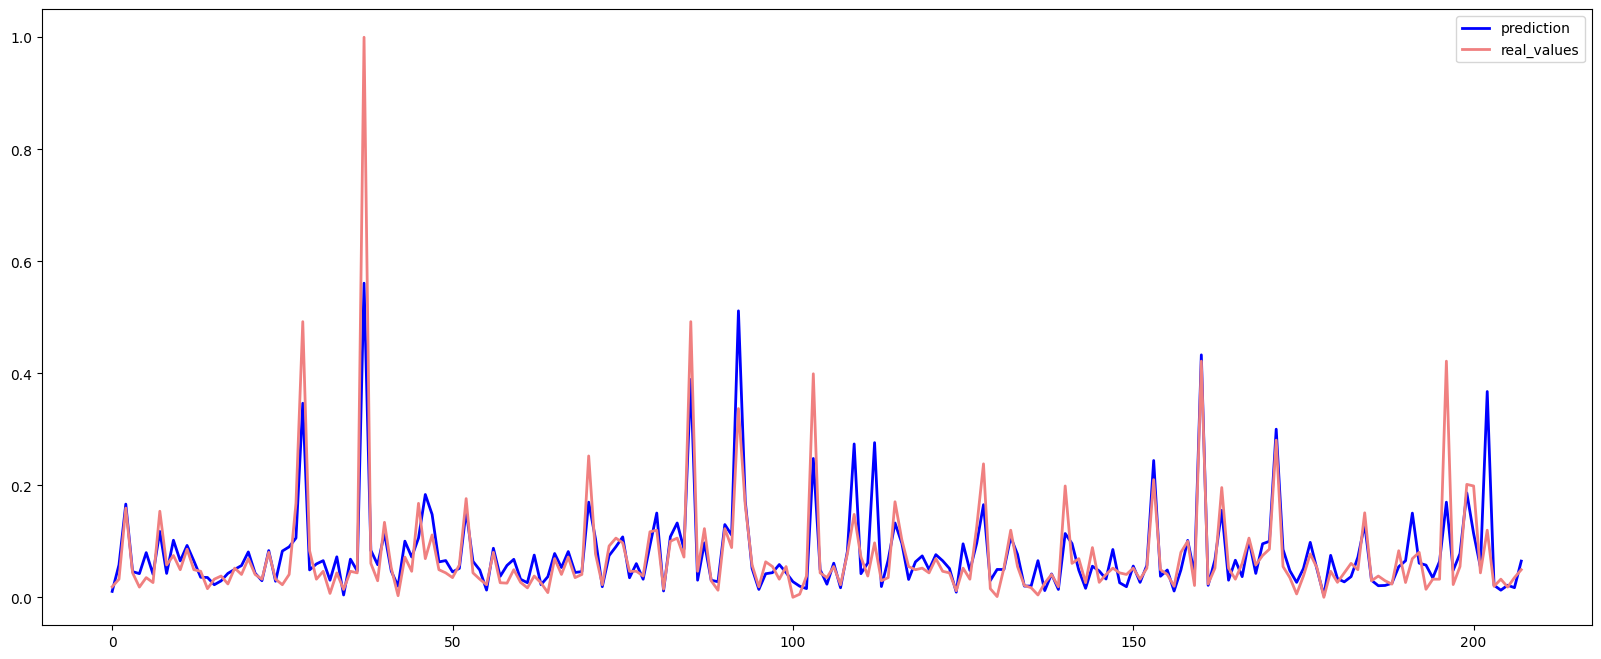

In [39]:
plt.figure(figsize=(20,8))
plt.plot(lr1.predict(X_test), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [40]:
# pkl_filename = "linear_regressor.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## neural network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Normalisasi data (jika diperlukan)
# df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']])

# Membagi data menjadi fitur dan target
# X = df_mx.drop('price', axis=1)
# Y = df_mx['price']

# Split data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Membangun model Neural Network
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer pertama
model1.add(Dense(32, activation='relu'))  # Hidden layer
model1.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Melatih model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluasi model
loss, mae1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE) on Test Set: {mae1}")

# Prediksi
predictions1 = model1.predict(X_test)

# Hitung R² Score (kinerja regresi)
r21 = r2_score(y_test, predictions1)
print(f"R² Score on Test Set: {r21:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0110 - mae: 0.0587 - val_loss: 0.0035 - val_mae: 0.0312
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mae: 0.0258 - val_loss: 0.0029 - val_mae: 0.0257
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mae: 0.0227 - val_loss: 0.0030 - val_mae: 0.0294
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0206 - val_loss: 0.0030 - val_mae: 0.0231
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0213 - val_loss: 0.0033 - val_mae: 0.0288
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - mae: 0.0242 - val_loss: 0.0031 - val_mae: 0.0232
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - mae: 0.0211 - val_loss: 0.0033 - val_mae: 0.0290
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mae: 0.0209 - val_loss: 0.0033 - val_mae: 0.0234
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - ma

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


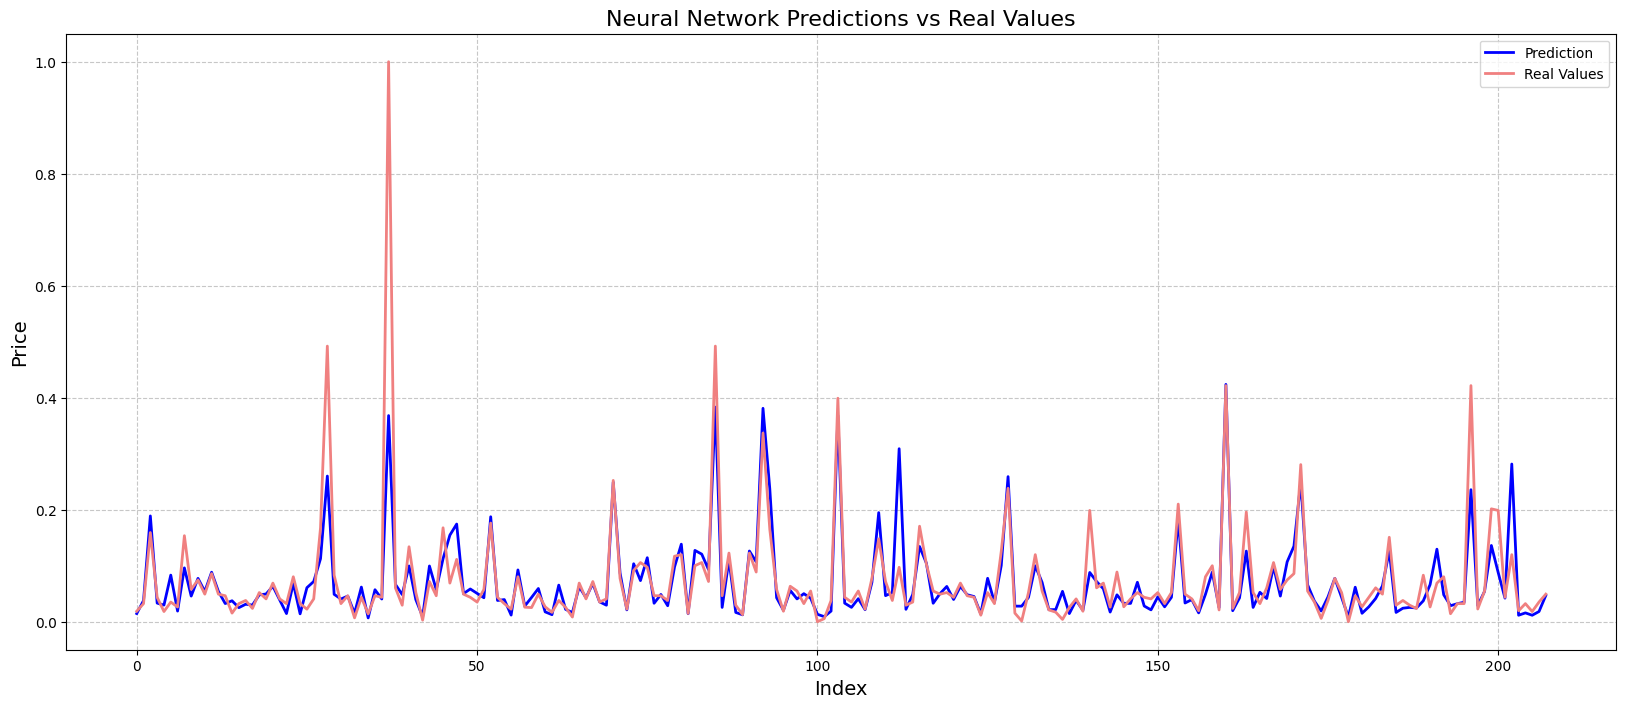

In [42]:
import matplotlib.pyplot as plt

# Prediksi dengan Neural Network
predictions_nn1 = model1.predict(X_test)

# Plotting hasil prediksi vs real values
plt.figure(figsize=(20, 8))
plt.plot(predictions_nn1, label="Prediction", linewidth=2.0, color='blue')
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.title("Neural Network Predictions vs Real Values", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Random Forest

In [43]:
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

In [44]:
# rf_acc = rf.score(X_test,y_test)*100
# print("Random Forest Regressor Accuracy - ",rf_acc)

In [45]:
# y_pred = rf.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [46]:
# plt.figure(figsize=(20,8))
# plt.plot(rf.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.title("Random Forest Predictions vs Real Values", fontsize=16)
# plt.legend(loc="best")
# plt.show()

## rf hyperparameter

In [47]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],       # Number of trees
#     'max_depth': [10, 20, 30, None],     # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],       # Minimum samples required at each leaf node
#     'bootstrap': [True, False]           # Whether bootstrap samples are used
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)


In [48]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("Random Forest Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default Random Forest Accuracy: 75.92%
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 75.59%


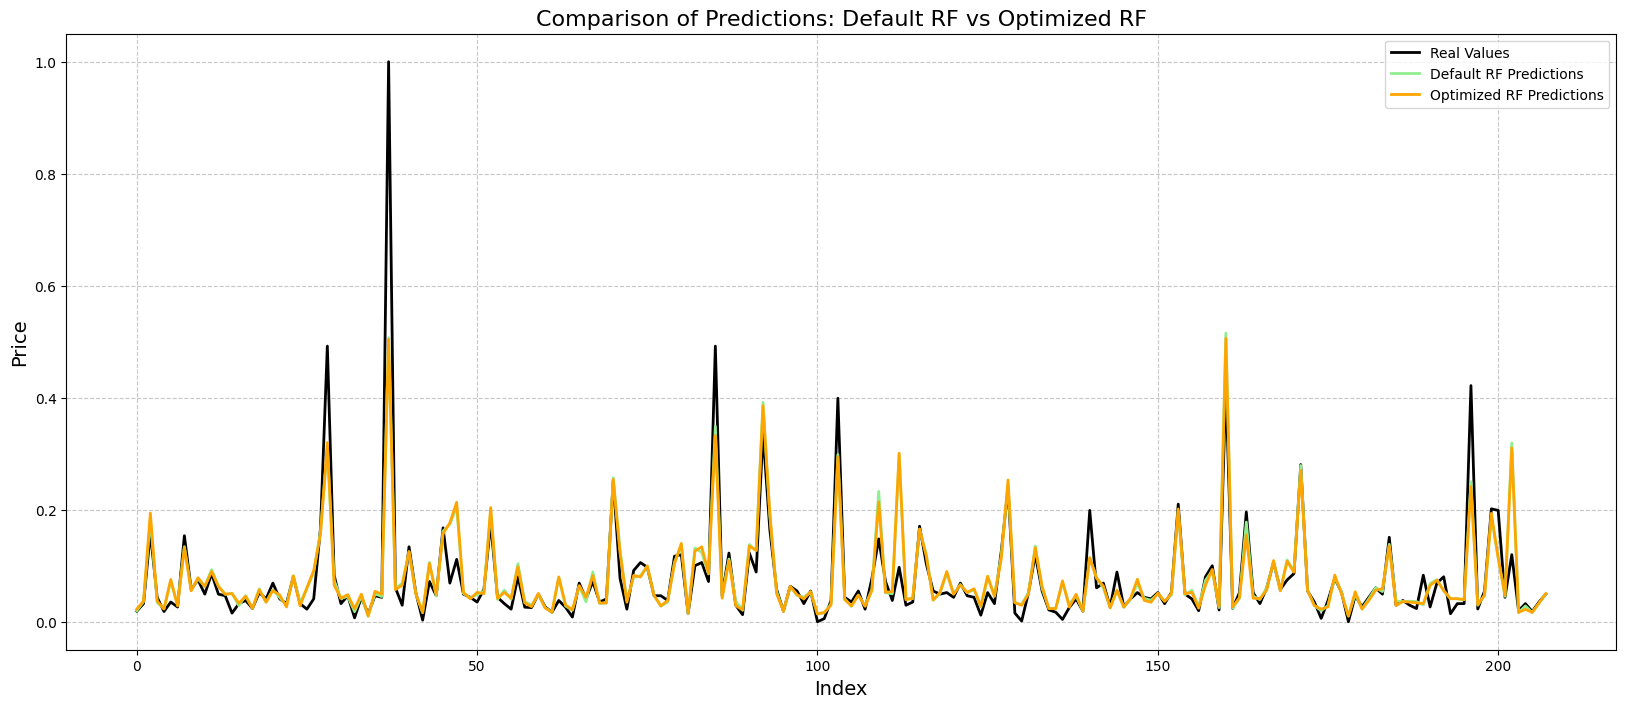

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
rf_default1 = RandomForestRegressor(random_state=42)
rf_default1.fit(X_train, y_train)
default_acc_rf1 = rf_default1.score(X_test, y_test) * 100
print(f"Default Random Forest Accuracy: {default_acc_rf1:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel per daun
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf1 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf1.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_rf = grid_search_rf1.best_params_
optimized_acc_rf1 = grid_search_rf1.score(X_test, y_test) * 100
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Optimized Random Forest Accuracy: {optimized_acc_rf1:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default_rf = rf_default1.predict(X_test)
y_pred_optimized_rf = grid_search_rf1.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default_rf, label="Default RF Predictions", linewidth=2.0, color='lightgreen')
plt.plot(y_pred_optimized_rf, label="Optimized RF Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default RF vs Optimized RF", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [50]:
y_predrfmm = rf_default1.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_predrfmm))
print("MSE" , metrics.mean_squared_error(y_test, y_predrfmm))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_predrfmm)))
print("R2" , metrics.explained_variance_score(y_test, y_predrfmm))

MAE 0.019876208330041875
MSE 0.0024830357998397072
RMSE 0.04983006923374387
R2 0.7596469186696224


In [51]:
y_predrfmmh = grid_search_rf1.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_predrfmmh))
print("MSE" , metrics.mean_squared_error(y_test, y_predrfmmh))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_predrfmmh)))
print("R2" , metrics.explained_variance_score(y_test, y_predrfmmh))

MAE 0.02046157615676225
MSE 0.0025167078045864014
RMSE 0.05016679982405098
R2 0.7562174507386903


#### KNN

In [52]:
# knn = KNeighborsRegressor(n_neighbors = 3)
# knn.fit(X_train,y_train)

In [53]:
# knn_acc = knn.score(X_test, y_test)*100
# print("KNeigbhbors Regressor Accuracy - ",knn_acc)

In [54]:
# y_pred = knn.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [55]:
# plt.figure(figsize=(20,8))
# plt.plot(knn.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.title("KNN vs Real Values", fontsize=16)
# plt.legend(loc="best")
# plt.show()

## KNN hyperparameter

In [56]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [1, 3, 5, 10, 15],  # Number of neighbors to use
#     'weights': ['uniform', 'distance'],  # Weighting strategy
#     'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
# }

# # Initialize the model
# knn = KNeighborsRegressor(n_neighbors=3)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)


In [57]:
# import matplotlib.pyplot as plt

# # Predict values using the trained model
# y_pred = grid_search.predict(X_test)

# # Plot the predictions vs real values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("KNN (Hyperparameter) and Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()



Default KNN Accuracy: 52.70%
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Optimized KNN Accuracy: 65.40%


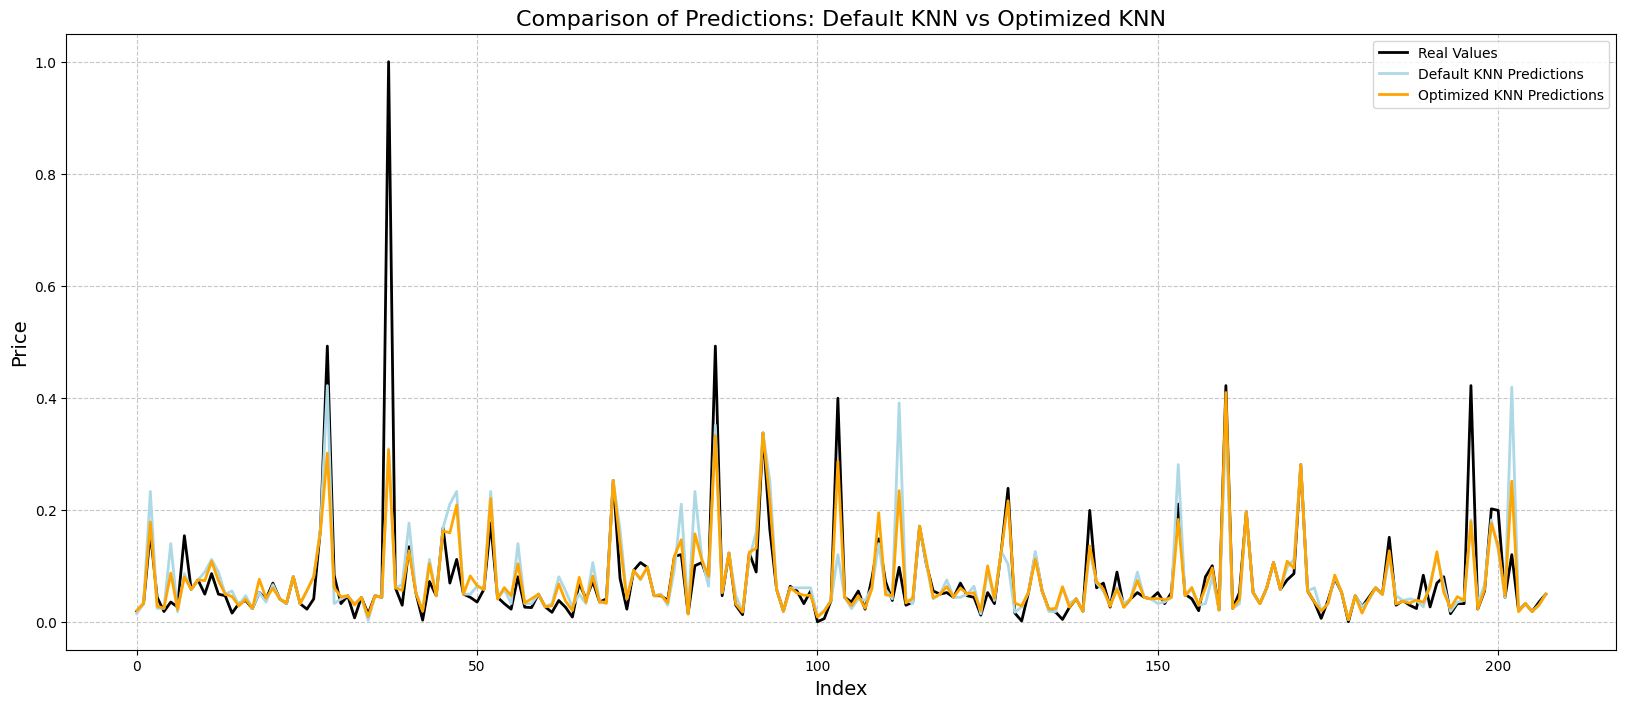

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
knn_default1 = KNeighborsRegressor(n_neighbors=1, weights='uniform')
knn_default1.fit(X_train, y_train)
default_acc_knn1 = knn_default1.score(X_test, y_test) * 100
print(f"Default KNN Accuracy: {default_acc_knn1:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor(n_neighbors=3)
grid_search_knn1 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn1.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params = grid_search_knn1.best_params_
optimized_acc_knn1 = grid_search_knn1.score(X_test, y_test) * 100
print("Best Hyperparameters:", best_params)
print(f"Optimized KNN Accuracy: {optimized_acc_knn1:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = knn_default1.predict(X_test)
y_pred_optimized = grid_search_knn1.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default KNN Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized KNN Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default KNN vs Optimized KNN", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [59]:
y_predknnmm = knn_default1.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_predknnmm))
print("MSE" , metrics.mean_squared_error(y_test, y_predknnmm))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_predknnmm)))
print("R2" , metrics.explained_variance_score(y_test, y_predknnmm))

MAE 0.026323868507139987
MSE 0.004877190659306581
RMSE 0.0698368860940018
R2 0.5276483291225598


In [60]:
y_predknnmmh = grid_search_knn1.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_predknnmmh))
print("MSE" , metrics.mean_squared_error(y_test, y_predknnmmh))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_predknnmmh)))
print("R2" , metrics.explained_variance_score(y_test, y_predknnmmh))

MAE 0.020067136480610367
MSE 0.0035677093510007663
RMSE 0.05973030513065178
R2 0.6540619267206353


#### XGBoost

In [61]:
# xgbr = XGBRegressor(random_state=42)
# xgbr.fit(X_train, y_train)

In [62]:
# xgb_acc = xgbr.score(X_test,y_test)*100
# print("XGBoost Regressor Accuracy - ",xgb_acc)

In [63]:
# y_pred = xgbr.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [64]:
# plt.figure(figsize=(20,8))
# plt.plot(xgbr.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.title("XGBoost vs Real Values", fontsize=16)
# plt.legend(loc="best")
# plt.show()

## xgbr hyperparameter

In [65]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for XGBoost
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],           # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],        # Step size at each iteration
#     'max_depth': [3, 6, 10],                   # Maximum depth of the trees
#     'subsample': [0.7, 0.8, 1.0],              # Proportion of samples used for training each tree
#     'colsample_bytree': [0.7, 0.8, 1.0],      # Proportion of features used for each tree
#     'gamma': [0, 0.1, 0.2]                    # Regularization parameter
# }

# # Initialize the XGBoost Regressor model
# xgbr = XGBRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# # Evaluate on the test set
# test_score_xgb = grid_search_xgb.score(X_test, y_test)

# print("Best Parameters for XGBoost:", best_params_xgb)
# print("Best CV Score (Training) for XGBoost:", best_score_xgb * 100)
# print("Test Set Accuracy for XGBoost:", test_score_xgb * 100)


In [66]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred_xgb, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("XGBoost Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default XGBoost Accuracy: 79.82%
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Optimized XGBoost Accuracy: 68.09%


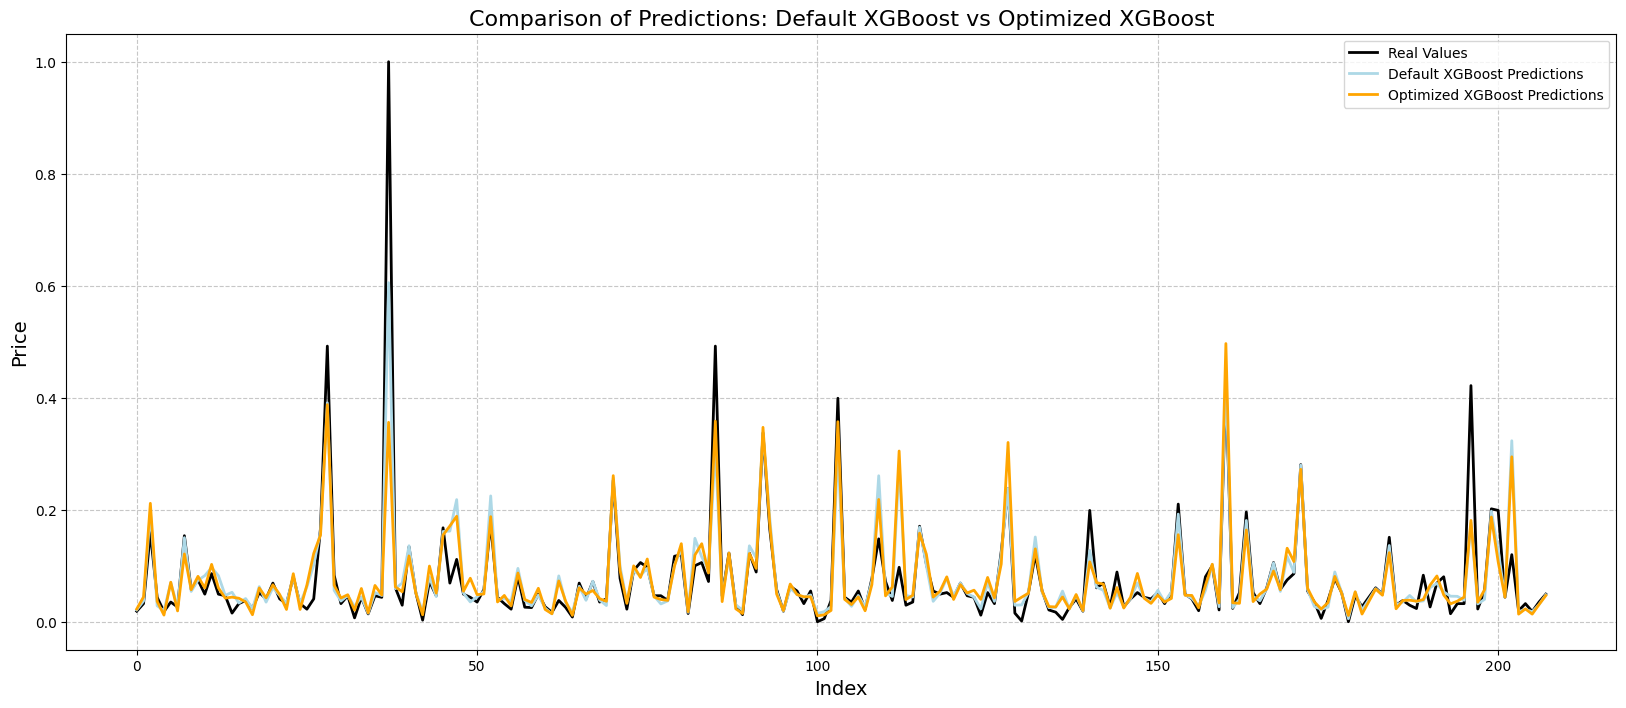

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
xgbr_default1 = XGBRegressor(random_state=42)
xgbr_default1.fit(X_train, y_train)
default_acc_xgbr1 = xgbr_default1.score(X_test, y_test) * 100
print(f"Default XGBoost Accuracy: {default_acc_xgbr1:.2f}%")

# Hyperparameter tuning dengan GridSearchCV untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Inisiasi model XGBoost
xgbr = XGBRegressor(random_state=42)

# GridSearchCV untuk XGBoost
grid_search_xgbr1 = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgbr1.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_xgbr = grid_search_xgbr1.best_params_
optimized_acc_xgbr1 = grid_search_xgbr1.score(X_test, y_test) * 100
print("Best Hyperparameters for XGBoost:", best_params_xgbr)
print(f"Optimized XGBoost Accuracy: {optimized_acc_xgbr1:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = xgbr_default1.predict(X_test)
y_pred_optimized = grid_search_xgbr1.predict(X_test)

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default XGBoost Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized XGBoost Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default XGBoost vs Optimized XGBoost", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [68]:
# pkl_filename = "rf_mx.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## Implementasi Standard Scaler

### Modeling

In [69]:
X2 = df_sc.drop('price',axis=1)
Y2 = df_sc['price']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,Y2, test_size=0.2)

## neural network

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Normalisasi data (jika diperlukan)
# df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']])

# Membagi data menjadi fitur dan target
# X = df_mx.drop('price', axis=1)
# Y = df_mx['price']

# Split data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Membangun model Neural Network
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer pertama
model2.add(Dense(32, activation='relu'))  # Hidden layer
model2.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Melatih model
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluasi model
loss, mae2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE) on Test Set: {mae2}")

# Prediksi
predictions = model2.predict(X_test)

# Hitung R² Score (kinerja regresi)
r22 = r2_score(y_test, predictions)
print(f"R² Score on Test Set: {r22:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8031 - mae: 0.4568 - val_loss: 0.1550 - val_mae: 0.2372
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3586 - mae: 0.2827 - val_loss: 0.1023 - val_mae: 0.1976
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2472 - mae: 0.2505 - val_loss: 0.1000 - val_mae: 0.1941
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3406 - mae: 0.2821 - val_loss: 0.0920 - val_mae: 0.1929
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1886 - mae: 0.2301 - val_loss: 0.0891 - val_mae: 0.1912
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2647 - mae: 0.2510 - val_loss: 0.0866 - val_mae: 0.1889
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2610 - mae: 0.2469 - val_loss: 0.0900 - val_mae: 0.1948
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2840 - mae: 0.2630 - val_loss: 0.0866 - val_mae: 0.1860
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2519 - mae: 0.2537 - va

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


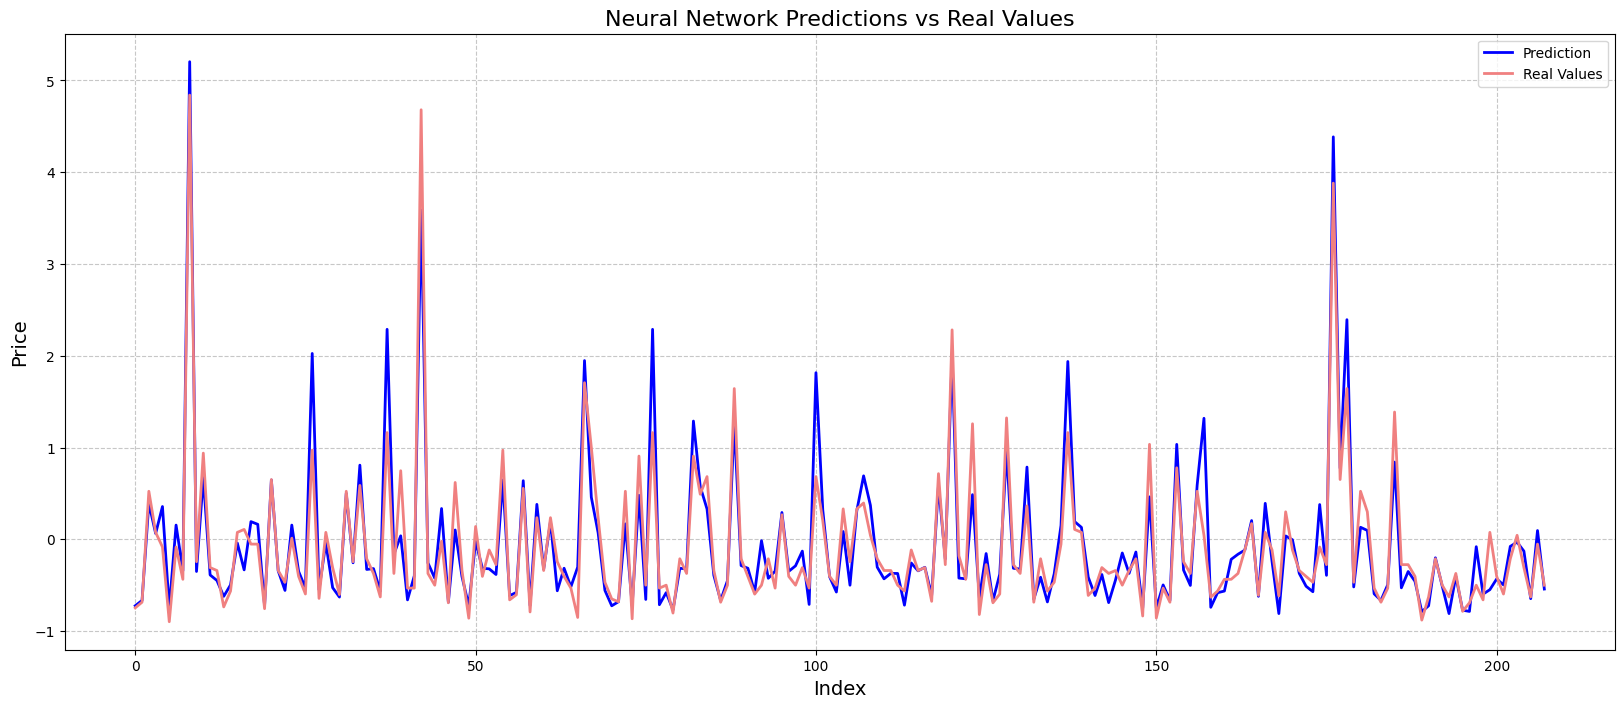

In [72]:
import matplotlib.pyplot as plt

# Prediksi dengan Neural Network
predictions_nn = model2.predict(X_test)

# Plotting hasil prediksi vs real values
plt.figure(figsize=(20, 8))
plt.plot(predictions_nn, label="Prediction", linewidth=2.0, color='blue')
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.title("Neural Network Predictions vs Real Values", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [73]:
# from sklearn.metrics import r2_score

# # Prediksi pada data test dengan Neural Network
# y_pred_nn = nn_model.predict(X_test_scaled)

# # Menghitung R² Score sebagai akurasi
# r2_nn = r2_score(y_test, y_pred_nn)
# nn_acc = r2_nn * 100
# print(f"Neural Network Accuracy (R² Score): {nn_acc:.2f}%")


#### Linear Regression

In [74]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [75]:
lr_acc = lr2.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  83.23981273900313


In [76]:
# y_pred = lr.predict(X_test)

# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

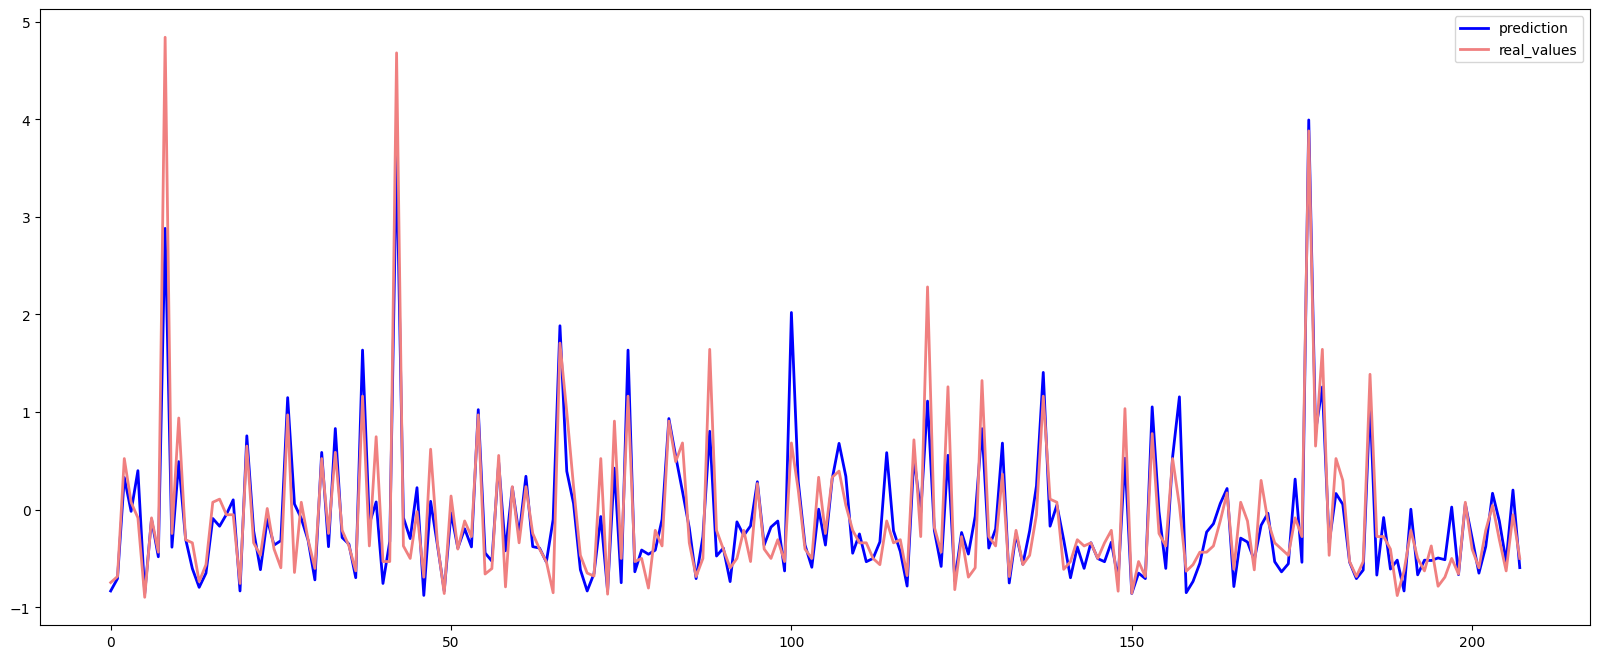

In [77]:
plt.figure(figsize=(20,8))
plt.plot(lr2.predict(X_test), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [78]:
# pkl_filename = "linear_regressor.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

#### Random Forest

In [79]:
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

In [80]:
# rf_acc = rf.score(X_test,y_test)*100
# print("Random Forest Regressor Accuracy - ",rf_acc)

In [81]:
# y_pred = rf.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [82]:
# plt.figure(figsize=(20,8))
# plt.plot(rf.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.title("Random Forest Predictions vs Real Values", fontsize=16)
# plt.legend(loc="best")
# plt.show()

## RF Hyperparameter

In [83]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],       # Number of trees
#     'max_depth': [10, 20, 30, None],     # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],       # Minimum samples required at each leaf node
#     'bootstrap': [True, False]           # Whether bootstrap samples are used
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)

In [84]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("Random Forest Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default Random Forest Accuracy: 84.43%
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 85.23%


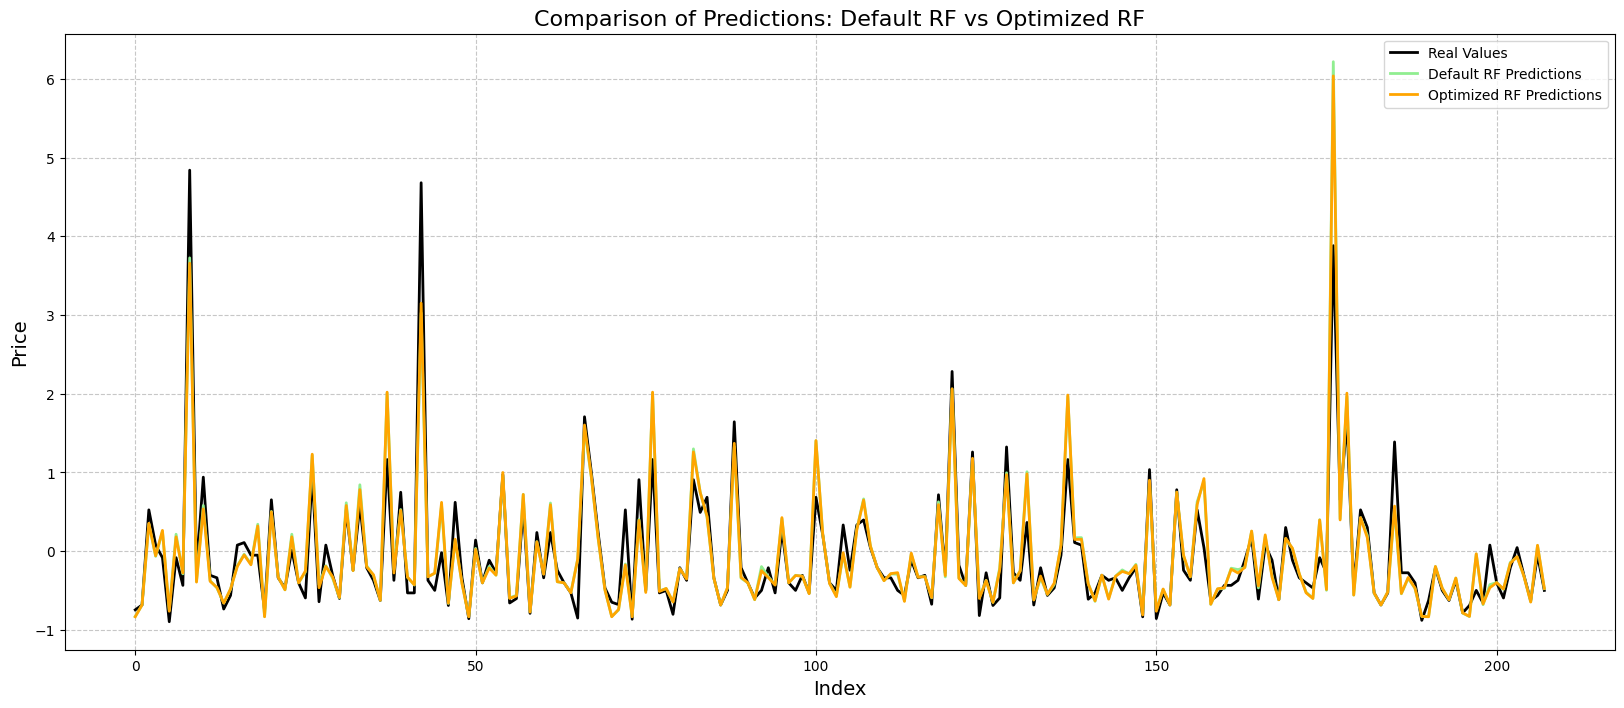

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
rf_default2 = RandomForestRegressor(random_state=42)
rf_default2.fit(X_train, y_train)
default_acc_rf2 = rf_default2.score(X_test, y_test) * 100
print(f"Default Random Forest Accuracy: {default_acc_rf2:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel per daun
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf2.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_rf = grid_search_rf2.best_params_
optimized_acc_rf2 = grid_search_rf2.score(X_test, y_test) * 100
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Optimized Random Forest Accuracy: {optimized_acc_rf2:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default_rf = rf_default2.predict(X_test)
y_pred_optimized_rf = grid_search_rf2.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default_rf, label="Default RF Predictions", linewidth=2.0, color='lightgreen')
plt.plot(y_pred_optimized_rf, label="Optimized RF Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default RF vs Optimized RF", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### KNN

In [86]:
# knn = KNeighborsRegressor(n_neighbors = 3)
# knn.fit(X_train,y_train)

In [87]:
# knn_acc = knn.score(X_test, y_test)*100
# print("KNeigbhbors Regressor Accuracy - ",knn_acc)

In [88]:
# y_pred = knn.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [89]:
# plt.figure(figsize=(20,8))
# plt.plot(knn.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.title("KNN vs Real Values", fontsize=16)
# plt.legend(loc="best")
# plt.show()

## KNN Hyperparameter

In [90]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [1, 3, 5, 10, 15],  # Number of neighbors to use
#     'weights': ['uniform', 'distance'],  # Weighting strategy
#     'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
# }

# # Initialize the model
# knn = KNeighborsRegressor(n_neighbors=3)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)


In [91]:
# import matplotlib.pyplot as plt

# # Predict values using the trained model
# y_pred = grid_search.predict(X_test)

# # Plot the predictions vs real values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("KNN (Hyperparameter) and Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default KNN Accuracy: 84.18%
Best Hyperparameters: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Optimized KNN Accuracy: 89.05%


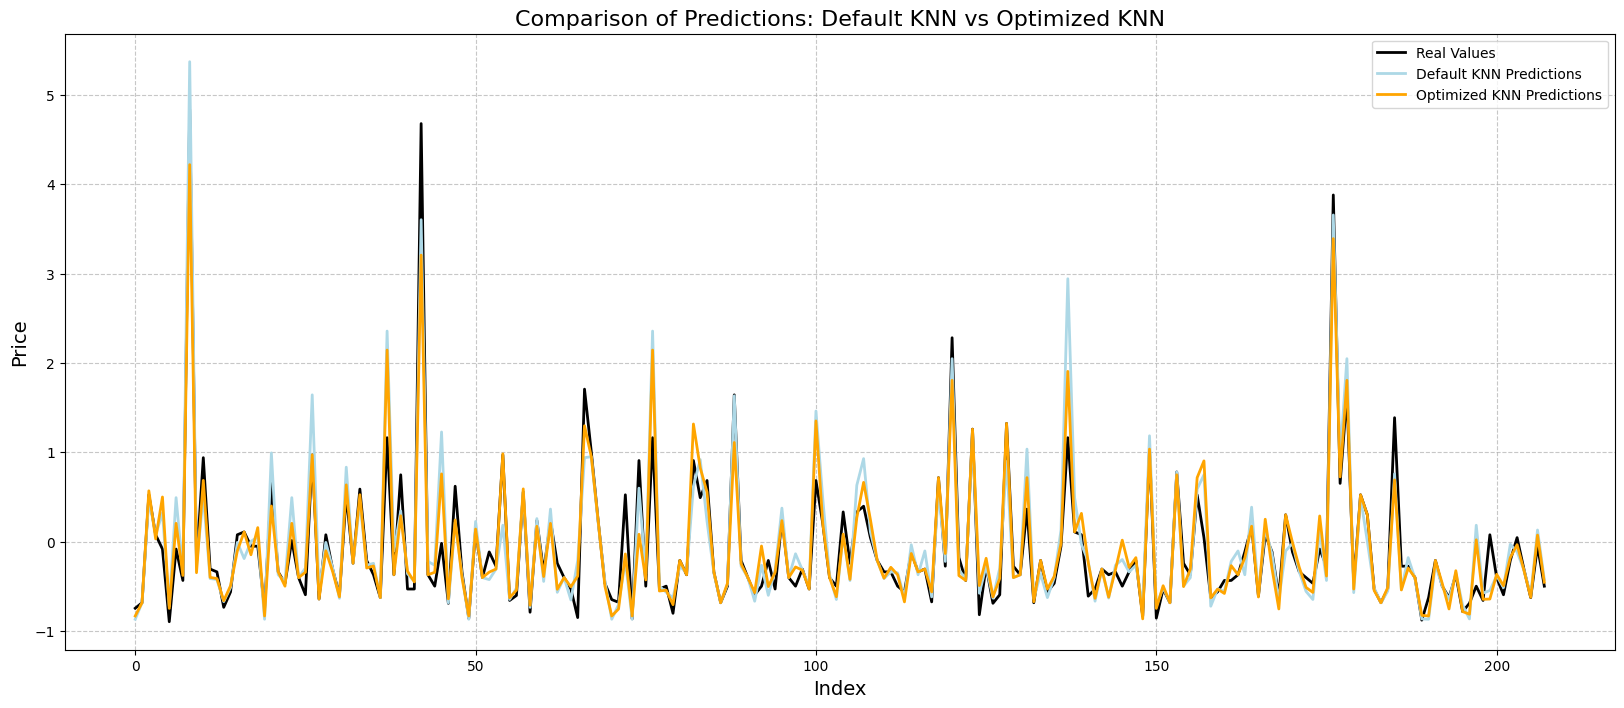

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
knn_default2 = KNeighborsRegressor(n_neighbors=3)
knn_default2.fit(X_train, y_train)
default_acc_knn2 = knn_default2.score(X_test, y_test) * 100
print(f"Default KNN Accuracy: {default_acc_knn2:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor(n_neighbors=3)
grid_search_knn2 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn2.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params = grid_search_knn2.best_params_
optimized_acc_knn2 = grid_search_knn2.score(X_test, y_test) * 100
print("Best Hyperparameters:", best_params)
print(f"Optimized KNN Accuracy: {optimized_acc_knn2:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = knn_default2.predict(X_test)
y_pred_optimized = grid_search_knn2.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default KNN Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized KNN Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default KNN vs Optimized KNN", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### XGBoost

In [93]:
# xgbr = XGBRegressor(random_state=42)
# xgbr.fit(X_train, y_train)

In [94]:
# xgb_acc = xgbr.score(X_test,y_test)*100
# print("XGBoost Regressor Accuracy - ",xgb_acc)

In [95]:
# y_pred = xgbr.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [96]:
# plt.figure(figsize=(20,8))
# plt.plot(xgbr.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.legend(loc="best")
# plt.show()

## XGBoost Hyperparameter

In [97]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for XGBoost
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],           # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],        # Step size at each iteration
#     'max_depth': [3, 6, 10],                   # Maximum depth of the trees
#     'subsample': [0.7, 0.8, 1.0],              # Proportion of samples used for training each tree
#     'colsample_bytree': [0.7, 0.8, 1.0],      # Proportion of features used for each tree
#     'gamma': [0, 0.1, 0.2]                    # Regularization parameter
# }

# # Initialize the XGBoost Regressor model
# xgbr = XGBRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# # Evaluate on the test set
# test_score_xgb = grid_search_xgb.score(X_test, y_test)

# print("Best Parameters for XGBoost:", best_params_xgb)
# print("Best CV Score (Training) for XGBoost:", best_score_xgb * 100)
# print("Test Set Accuracy for XGBoost:", test_score_xgb * 100)


In [98]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred_xgb, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("XGBoost Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

Default XGBoost Accuracy: 75.93%
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Optimized XGBoost Accuracy: 76.19%


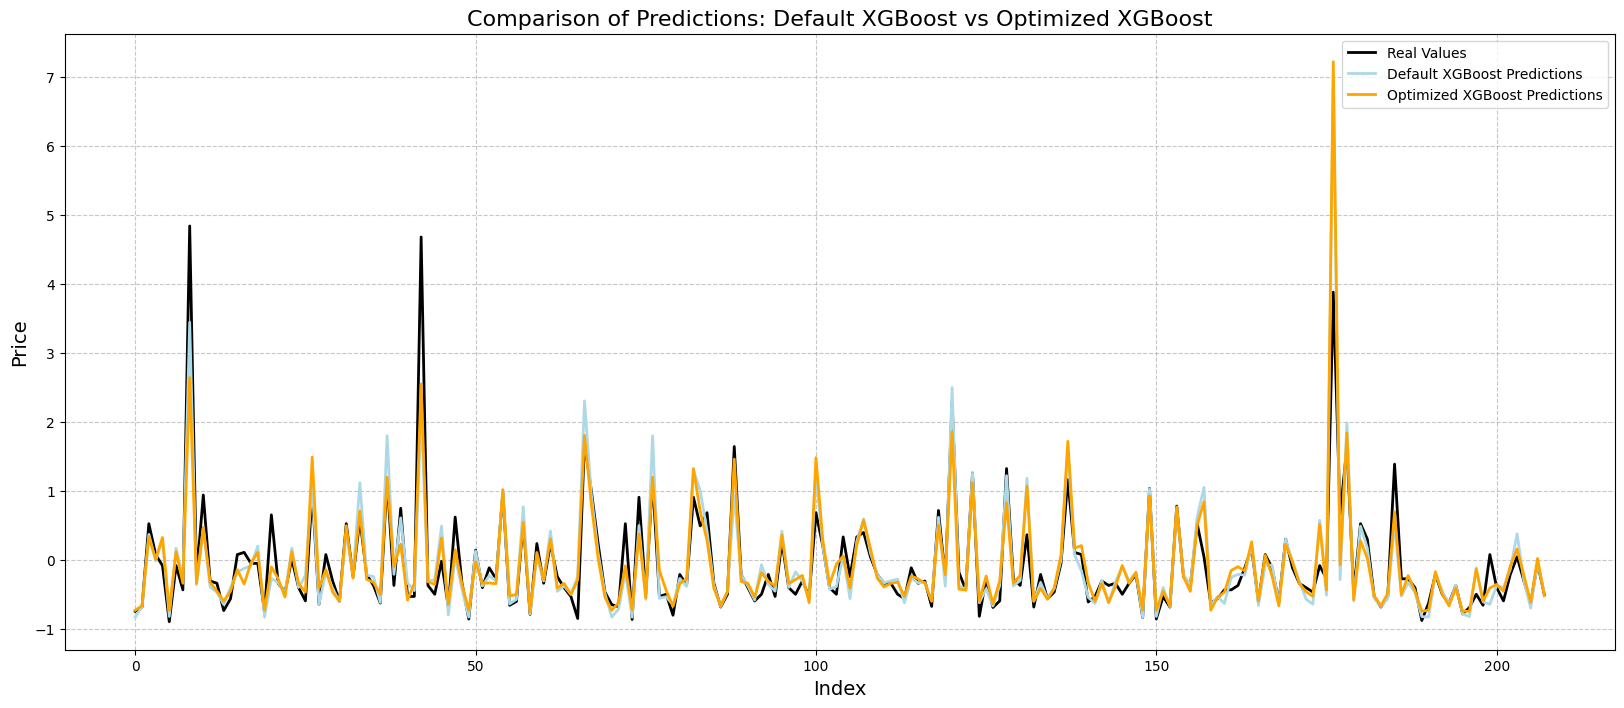

In [99]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
xgbr_default2 = XGBRegressor(random_state=42)
xgbr_default2.fit(X_train, y_train)
default_acc_xgbr2 = xgbr_default2.score(X_test, y_test) * 100
print(f"Default XGBoost Accuracy: {default_acc_xgbr2:.2f}%")

# Hyperparameter tuning dengan GridSearchCV untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Inisiasi model XGBoost
xgbr = XGBRegressor(random_state=42)

# GridSearchCV untuk XGBoost
grid_search_xgbr2 = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgbr2.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_xgbr = grid_search_xgbr2.best_params_
optimized_acc_xgbr2 = grid_search_xgbr2.score(X_test, y_test) * 100
print("Best Hyperparameters for XGBoost:", best_params_xgbr)
print(f"Optimized XGBoost Accuracy: {optimized_acc_xgbr2:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = xgbr_default2.predict(X_test)
y_pred_optimized = grid_search_xgbr2.predict(X_test)

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default XGBoost Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized XGBoost Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default XGBoost vs Optimized XGBoost", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [100]:
# pkl_filename = "rf_sc.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

## Implementasi Robust Scaler

### Modeling

In [101]:
X3 = df_rb.drop('price',axis=1)
Y3 = df_rb['price']

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X3,Y3, test_size=0.2)

## nerual network

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Normalisasi data (jika diperlukan)
# df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']] = scaler.fit_transform(df_mx[['Kecamatan','Kota', 'KT', 'LT','LB','price']])

# Membagi data menjadi fitur dan target
# X = df_mx.drop('price', axis=1)
# Y = df_mx['price']

# Split data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Membangun model Neural Network
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer pertama
model3.add(Dense(32, activation='relu'))  # Hidden layer
model3.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Melatih model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluasi model
loss, mae3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE) on Test Set: {mae3}")

# Prediksi
predictions = model3.predict(X_test)

# Hitung R² Score (kinerja regresi)
r23 = r2_score(y_test, predictions)
print(f"R² Score on Test Set: {r23:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.5040 - mae: 0.6812 - val_loss: 1.4018 - val_mae: 0.5242
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8801 - mae: 0.4830 - val_loss: 0.8301 - val_mae: 0.4058
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6099 - mae: 0.4261 - val_loss: 0.6248 - val_mae: 0.3294
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5047 - mae: 0.3809 - val_loss: 0.6002 - val_mae: 0.3191
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5699 - mae: 0.3832 - val_loss: 0.5518 - val_mae: 0.3299
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4851 - mae: 0.3441 - val_loss: 0.5721 - val_mae: 0.3217
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6380 - mae: 0.4161 - val_loss: 0.5981 - val_mae: 0.3218
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3951 - mae: 0.3383 - val_loss: 0.6522 - val_mae: 0.3263
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5526 - mae: 0.3674 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


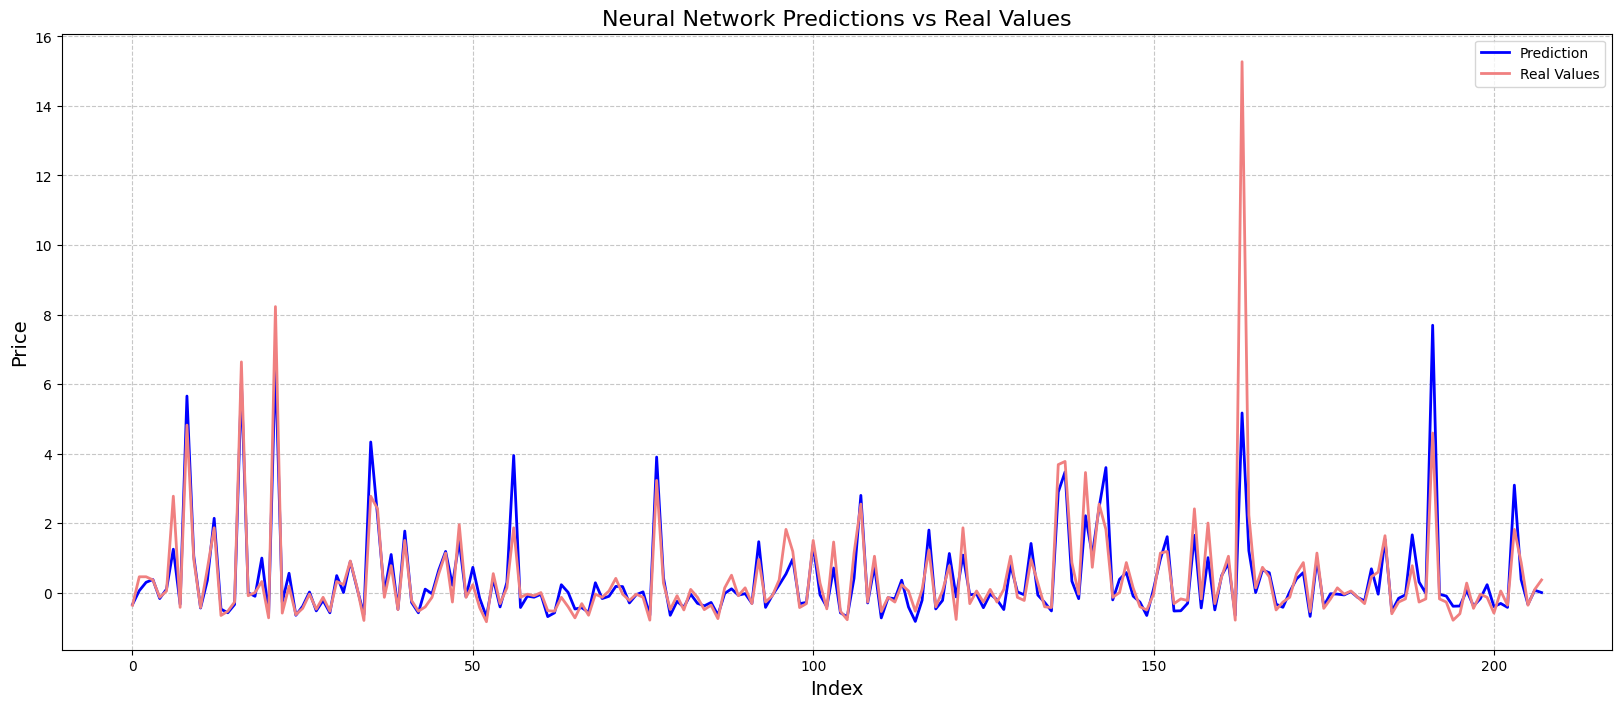

In [104]:
import matplotlib.pyplot as plt

# Prediksi dengan Neural Network
predictions_nn = model3.predict(X_test)

# Plotting hasil prediksi vs real values
plt.figure(figsize=(20, 8))
plt.plot(predictions_nn, label="Prediction", linewidth=2.0, color='blue')
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.title("Neural Network Predictions vs Real Values", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Linear Regression

In [105]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [106]:
lr_acc3 = lr3.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc3)

Linear Regressor Accuracy -  78.61859269453478


In [107]:
# y_pred = lr.predict(X_test)

# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

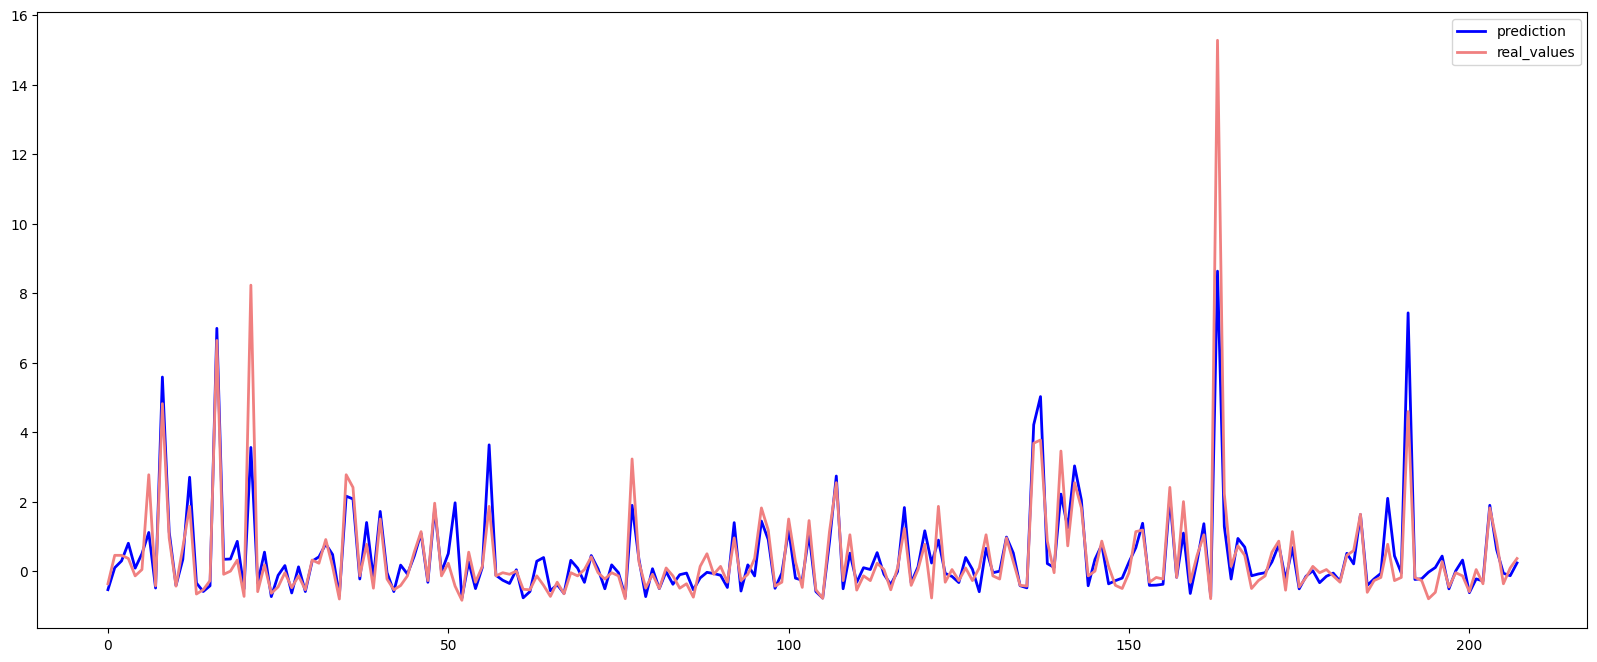

In [108]:
plt.figure(figsize=(20,8))
plt.plot(lr3.predict(X_test), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [109]:
# pkl_filename = "linear_regressor.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

#### Random Forest

In [110]:
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

In [111]:
# rf_acc = rf.score(X_test,y_test)*100
# print("Random Forest Regressor Accuracy - ",rf_acc)

In [112]:
# y_pred = rf.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [113]:
# plt.figure(figsize=(20,8))
# plt.plot(rf.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.legend(loc="best")
# plt.show()

## RF Hyperparameter

In [114]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],       # Number of trees
#     'max_depth': [10, 20, 30, None],     # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],       # Minimum samples required at each leaf node
#     'bootstrap': [True, False]           # Whether bootstrap samples are used
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)

In [115]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("Random Forest Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default Random Forest Accuracy: 78.23%
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 75.59%


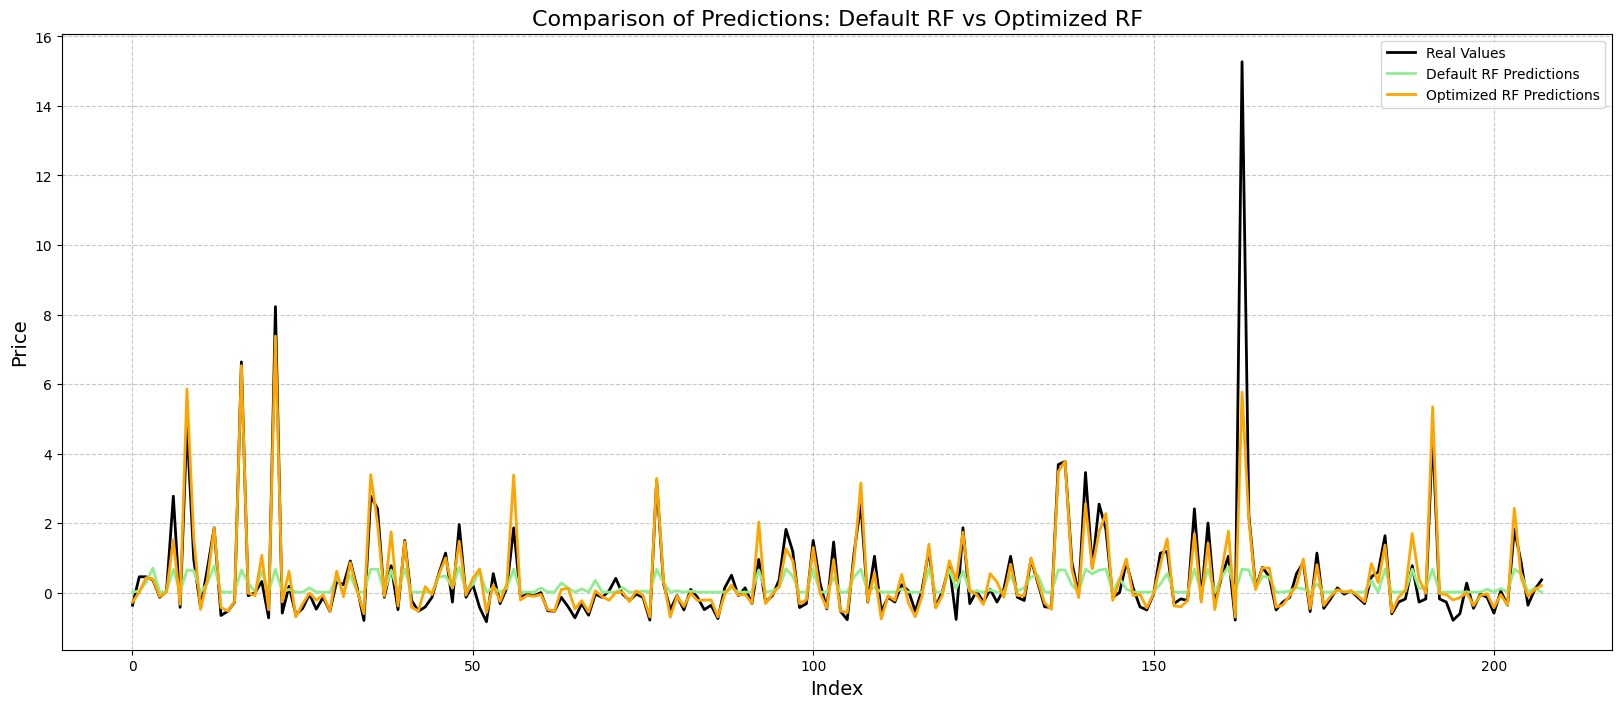

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
rf_default3 = RandomForestRegressor(random_state=42)
rf_default3.fit(X_train, y_train)
default_acc_rf3 = rf_default3.score(X_test, y_test) * 100
print(f"Default Random Forest Accuracy: {default_acc_rf3:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel per daun
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf3.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_rf = grid_search_rf3.best_params_
optimized_acc_rf3 = grid_search_rf3.score(X_test, y_test) * 100
print("Best Hyperparameters for Random Forest:", best_params_rf)
print(f"Optimized Random Forest Accuracy: {optimized_acc_rf1:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default_rf = rf_default1.predict(X_test)
y_pred_optimized_rf = grid_search_rf3.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default_rf, label="Default RF Predictions", linewidth=2.0, color='lightgreen')
plt.plot(y_pred_optimized_rf, label="Optimized RF Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default RF vs Optimized RF", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### KNN

In [117]:
# knn = KNeighborsRegressor(n_neighbors = 3)
# knn.fit(X_train,y_train)

In [118]:
# knn_acc = knn.score(X_test, y_test)*100
# print("KNeigbhbors Regressor Accuracy - ",knn_acc)

In [119]:
# y_pred = knn.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [120]:
# plt.figure(figsize=(20,8))
# plt.plot(knn.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.legend(loc="best")
# plt.show()

## KNN Hyperparameter

In [121]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [1, 3, 5, 10, 15],  # Number of neighbors to use
#     'weights': ['uniform', 'distance'],  # Weighting strategy
#     'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
# }

# # Initialize the model
# knn = KNeighborsRegressor(n_neighbors=3)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)

# print("Best Parameters:", best_params)
# print("Best CV Score (Training):", best_score * 100)
# print("Test Set Accuracy:", test_score * 100)


In [122]:
# import matplotlib.pyplot as plt

# # Predict values using the trained model
# y_pred = grid_search.predict(X_test)

# # Plot the predictions vs real values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("KNN (Hyperparameter) and Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


Default KNN Accuracy: 61.71%
Best Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Optimized KNN Accuracy: 77.46%


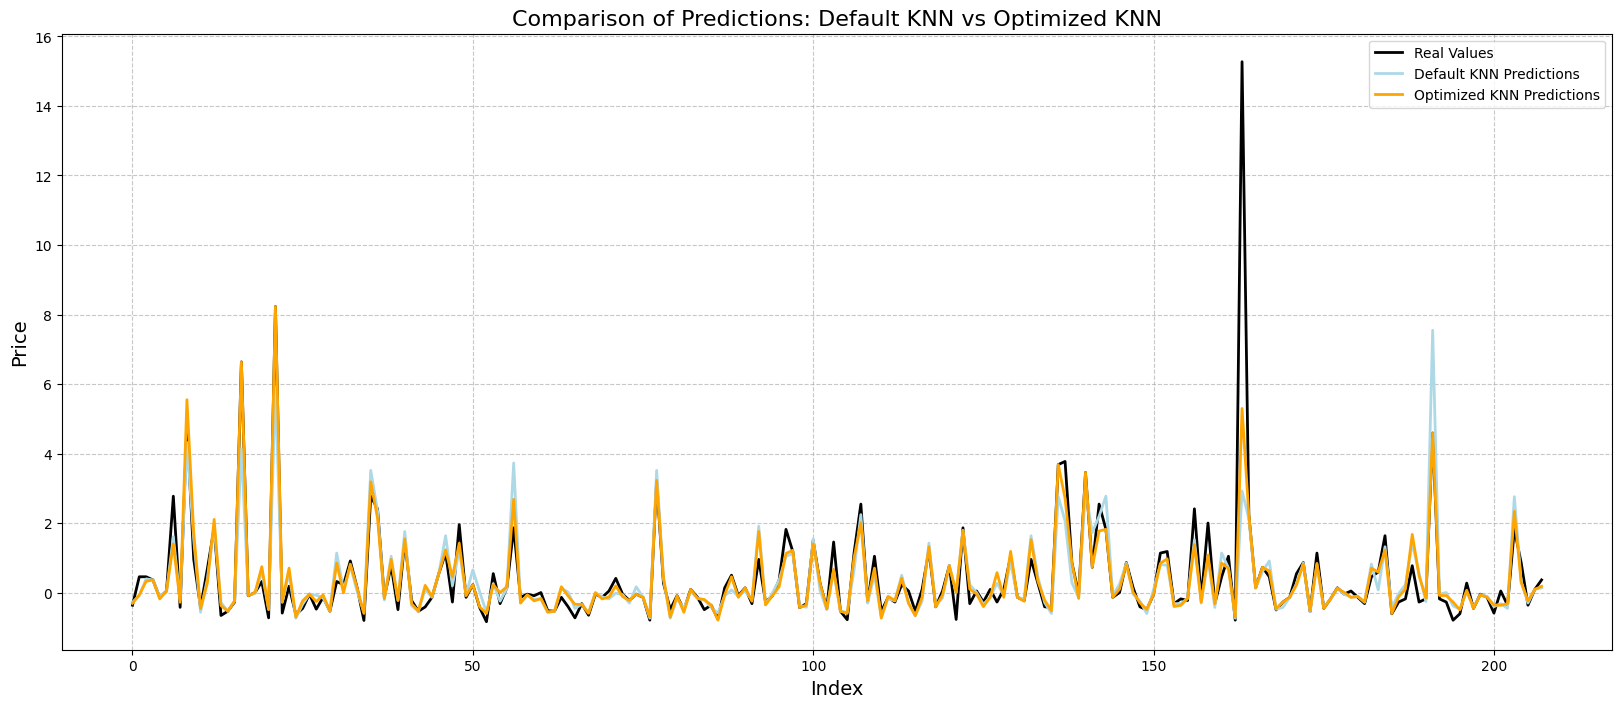

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
knn_default3 = KNeighborsRegressor(n_neighbors=3)
knn_default3.fit(X_train, y_train)
default_acc_knn3 = knn_default3.score(X_test, y_test) * 100
print(f"Default KNN Accuracy: {default_acc_knn3:.2f}%")

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn = KNeighborsRegressor(n_neighbors=3)
grid_search_knn3 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn3.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params = grid_search_knn3.best_params_
optimized_acc_knn3 = grid_search_knn3.score(X_test, y_test) * 100
print("Best Hyperparameters:", best_params)
print(f"Optimized KNN Accuracy: {optimized_acc_knn3:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = knn_default3.predict(X_test)
y_pred_optimized = grid_search_knn3.predict(X_test)

plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default KNN Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized KNN Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default KNN vs Optimized KNN", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### XGBoost

In [124]:
xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
# xgb_acc = xgbr.score(X_test,y_test)*100
# print("XGBoost Regressor Accuracy - ",xgb_acc)

In [126]:
# y_pred = xgbr.predict(X_test)
# print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
# print("MSE" , metrics.mean_squared_error(y_test, y_pred))
# print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2" , metrics.explained_variance_score(y_test, y_pred))

In [127]:
# plt.figure(figsize=(20,8))
# plt.plot(xgbr.predict(X_test), label="prediction", linewidth=2.0,color='blue')
# plt.plot(y_test.values, label="real_values", linewidth=2.0,color='lightcoral')
# plt.legend(loc="best")
# plt.show()

## XGBoost Hyperparameter

In [128]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for XGBoost
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],           # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],        # Step size at each iteration
#     'max_depth': [3, 6, 10],                   # Maximum depth of the trees
#     'subsample': [0.7, 0.8, 1.0],              # Proportion of samples used for training each tree
#     'colsample_bytree': [0.7, 0.8, 1.0],      # Proportion of features used for each tree
#     'gamma': [0, 0.1, 0.2]                    # Regularization parameter
# }

# # Initialize the XGBoost Regressor model
# xgbr = XGBRegressor(random_state=42)

# # Perform grid search with cross-validation
# grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# # Evaluate on the test set
# test_score_xgb = grid_search_xgb.score(X_test, y_test)

# print("Best Parameters for XGBoost:", best_params_xgb)
# print("Best CV Score (Training) for XGBoost:", best_score_xgb * 100)
# print("Test Set Accuracy for XGBoost:", test_score_xgb * 100)


In [129]:
# import matplotlib.pyplot as plt

# # Get predictions from the best model
# y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

# # Plotting the comparison between predictions and actual values
# plt.figure(figsize=(20, 8))
# plt.plot(y_pred_xgb, label="Prediction", linewidth=2.0, color='blue')
# plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='lightcoral')
# plt.legend(loc="best")
# plt.title("XGBoost Predictions (Hyperparameter) vs Real Values", fontsize=16)
# plt.xlabel("Index", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

Default XGBoost Accuracy: 85.02%
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Optimized XGBoost Accuracy: 71.70%


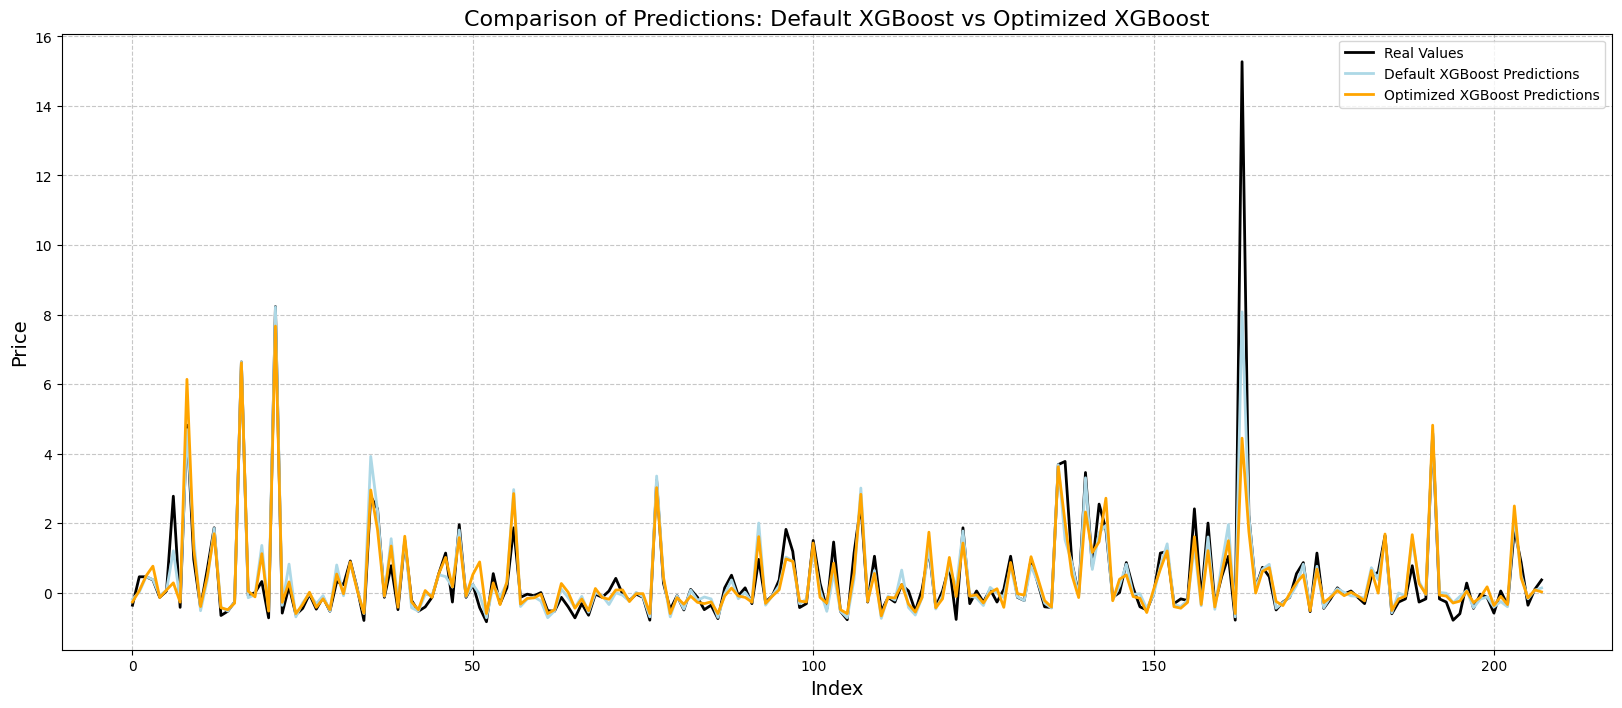

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Model default tanpa hyperparameter tuning
xgbr_default3 = XGBRegressor(random_state=42)
xgbr_default3.fit(X_train, y_train)
default_acc_xgbr3 = xgbr_default3.score(X_test, y_test) * 100
print(f"Default XGBoost Accuracy: {default_acc_xgbr3:.2f}%")

# Hyperparameter tuning dengan GridSearchCV untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Inisiasi model XGBoost
xgbr = XGBRegressor(random_state=42)

# GridSearchCV untuk XGBoost
grid_search_xgbr3 = GridSearchCV(estimator=xgbr, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgbr3.fit(X_train, y_train)

# Hasil model dengan hyperparameter tuning
best_params_xgbr = grid_search_xgbr3.best_params_
optimized_acc_xgbr3 = grid_search_xgbr3.score(X_test, y_test) * 100
print("Best Hyperparameters for XGBoost:", best_params_xgbr)
print(f"Optimized XGBoost Accuracy: {optimized_acc_xgbr3:.2f}%")

# Perbandingan plot prediksi antara model default dan model yang dioptimalkan
y_pred_default = xgbr_default3.predict(X_test)
y_pred_optimized = grid_search_xgbr3.predict(X_test)

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label="Real Values", linewidth=2.0, color='black')
plt.plot(y_pred_default, label="Default XGBoost Predictions", linewidth=2.0, color='lightblue')
plt.plot(y_pred_optimized, label="Optimized XGBoost Predictions", linewidth=2.0, color='orange')
plt.legend(loc="best")
plt.title("Comparison of Predictions: Default XGBoost vs Optimized XGBoost", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [131]:
from prettytable import PrettyTable

# Membuat tabel
table = PrettyTable()
table.field_names = ["Model", "Scaling", "R² Score (%)", "MAE"]

# Menambahkan data ke tabel
table.add_row(["Linear Regression", "MinMax", f"{lr_acc1:.2f}", "-"])
table.add_row(["Neural Network", "MinMax", f"{r21 * 100:.2f}", f"{mae1:.2f}"])
table.add_row(["Random Forest (Default)", "MinMax", f"{default_acc_rf1:.2f}", "-"])
table.add_row(["Random Forest (Optimized)", "MinMax", f"{optimized_acc_rf1:.2f}", "-"])
table.add_row(["KNN (Default)", "MinMax", f"{default_acc_knn1:.2f}", "-"])
table.add_row(["KNN (Optimized)", "MinMax", f"{optimized_acc_knn1:.2f}", "-"])
table.add_row(["XGBoost (Default)", "MinMax", f"{default_acc_xgbr1:.2f}", "-"])
table.add_row(["XGBoost (Optimized)", "MinMax", f"{optimized_acc_xgbr1:.2f}", "-"])

# Menampilkan tabel
print(table)


+---------------------------+---------+--------------+------+
|           Model           | Scaling | R² Score (%) | MAE  |
+---------------------------+---------+--------------+------+
|     Linear Regression     |  MinMax |    72.70     |  -   |
|       Neural Network      |  MinMax |    67.84     | 0.02 |
|  Random Forest (Default)  |  MinMax |    75.92     |  -   |
| Random Forest (Optimized) |  MinMax |    75.59     |  -   |
|       KNN (Default)       |  MinMax |    52.70     |  -   |
|      KNN (Optimized)      |  MinMax |    65.40     |  -   |
|     XGBoost (Default)     |  MinMax |    79.82     |  -   |
|    XGBoost (Optimized)    |  MinMax |    68.09     |  -   |
+---------------------------+---------+--------------+------+


In [132]:
from prettytable import PrettyTable

# Membuat tabel
table = PrettyTable()
table.field_names = ["Model", "Scaling", "R² Score (%)", "MAE"]

# Menambahkan data ke tabel (dengan asumsi variabel sudah didefinisikan sebelumnya)
table.add_row(["Linear Regression", "Standard Scaler", f"{lr_acc:.2f}", "-"])
table.add_row(["Neural Network", "Standard Scaler", f"{r22 * 100:.2f}", f"{mae2:.2f}"])
table.add_row(["Random Forest (Default)", "Standard Scaler", f"{default_acc_rf2:.2f}", "-"])
table.add_row(["Random Forest (Optimized)", "Standard Scaler", f"{optimized_acc_rf2:.2f}", "-"])
table.add_row(["KNN (Default)", "Standard Scaler", f"{default_acc_knn2:.2f}", "-"])
table.add_row(["KNN (Optimized)", "Standard Scaler", f"{optimized_acc_knn2:.2f}", "-"])
table.add_row(["XGBoost (Default)", "Standard Scaler", f"{default_acc_xgbr2:.2f}", "-"])
table.add_row(["XGBoost (Optimized)", "Standard Scaler", f"{optimized_acc_xgbr2:.2f}", "-"])

# Menampilkan tabel
print(table)


+---------------------------+-----------------+--------------+------+
|           Model           |     Scaling     | R² Score (%) | MAE  |
+---------------------------+-----------------+--------------+------+
|     Linear Regression     | Standard Scaler |    83.24     |  -   |
|       Neural Network      | Standard Scaler |    86.41     | 0.19 |
|  Random Forest (Default)  | Standard Scaler |    84.43     |  -   |
| Random Forest (Optimized) | Standard Scaler |    85.23     |  -   |
|       KNN (Default)       | Standard Scaler |    84.18     |  -   |
|      KNN (Optimized)      | Standard Scaler |    89.05     |  -   |
|     XGBoost (Default)     | Standard Scaler |    75.93     |  -   |
|    XGBoost (Optimized)    | Standard Scaler |    76.19     |  -   |
+---------------------------+-----------------+--------------+------+


In [133]:
from prettytable import PrettyTable

# Membuat tabel
table = PrettyTable()
table.field_names = ["Model", "Scaling", "R² Score (%)", "MAE"]

# Menambahkan data ke tabel
table.add_row(["Linear Regression", "Robust", f"{lr_acc3:.2f}", "-"])
table.add_row(["Neural Network", "Robust", f"{r23 * 100:.2f}", f"{mae3:.2f}"])
table.add_row(["Random Forest (Default)", "Robust", f"{default_acc_rf3:.2f}", "-"])
table.add_row(["Random Forest (Optimized)", "Robust", f"{optimized_acc_rf3:.2f}", "-"])
table.add_row(["KNN (Default)", "Robust", f"{default_acc_knn3:.2f}", "-"])
table.add_row(["KNN (Optimized)", "Robust", f"{optimized_acc_knn3:.2f}", "-"])
table.add_row(["XGBoost (Default)", "Robust", f"{default_acc_xgbr3:.2f}", "-"])
table.add_row(["XGBoost (Optimized)", "Robust", f"{optimized_acc_xgbr3:.2f}", "-"])

# Menampilkan tabel
print(table)


+---------------------------+---------+--------------+------+
|           Model           | Scaling | R² Score (%) | MAE  |
+---------------------------+---------+--------------+------+
|     Linear Regression     |  Robust |    78.62     |  -   |
|       Neural Network      |  Robust |    71.89     | 0.33 |
|  Random Forest (Default)  |  Robust |    78.23     |  -   |
| Random Forest (Optimized) |  Robust |    78.15     |  -   |
|       KNN (Default)       |  Robust |    61.71     |  -   |
|      KNN (Optimized)      |  Robust |    77.46     |  -   |
|     XGBoost (Default)     |  Robust |    85.02     |  -   |
|    XGBoost (Optimized)    |  Robust |    71.70     |  -   |
+---------------------------+---------+--------------+------+


In [143]:
import pandas as pd
from joblib import dump, load
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Menyimpan model terbaik
dump(grid_search_knn2, 'best_model.joblib')
print("Model terbaik (KNN Optimized) berhasil disimpan sebagai 'best_model.joblib'.")

# 2. Memuat model terbaik
best_model = load('best_model.joblib')
print("Model terbaik berhasil dimuat kembali.")

# 3. Testing dengan model terbaik
y_pred_best = best_model.predict(X_test)

# Hitung metrik evaluasi
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"R² Score (Best Model): {r2_best:.2f}")
print(f"Mean Absolute Error (MAE) (Best Model): {mae_best:.2f}")

# 4. Ekspor hasil testing ke Excel
# Buat DataFrame untuk hasil
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_best
})

# Simpan ke file Excel
results_df.to_excel('knn_predictions.xlsx', index=False)
print("Hasil prediksi berhasil disimpan ke 'knn_predictions.xlsx'.")


Model terbaik (KNN Optimized) berhasil disimpan sebagai 'best_model.joblib'.
Model terbaik berhasil dimuat kembali.
R² Score (Best Model): 0.66
Mean Absolute Error (MAE) (Best Model): 0.37
Hasil prediksi berhasil disimpan ke 'knn_predictions.xlsx'.


In [135]:
# xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #perbandingan act vbs pred
# xgb_df.to_excel('xgb_real_pred.xlsx')
# xgb_df

In [136]:
# pkl_filename = "xgbr_rb.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(xgbr, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

In [137]:
# Y_scale = df['price']
# Y_scale = Y_scale.values.reshape(-1, 1)
# Y_scale

In [138]:
# y_train

In [139]:
# scaler = RobustScaler().fit(Y_scale)

# pkl_filename = "scaler_rb.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(scaler, file)
#   print("Saved model to disk")
# else:
#   print("Model already saved")

In [140]:
# import joblib
# price_scaler = joblib.load('scaler_rb.pkl')

In [141]:
# y_test_2d = np.array(y_test).reshape(-1, 1)
# y_pred_2d = np.array(y_pred).reshape(-1, 1)

# actual = price_scaler.inverse_transform(y_test_2d)
# predict = price_scaler.inverse_transform(y_pred_2d)

In [142]:
# xgbdf = pd.DataFrame({
#     'Actual': actual.flatten(),  # Gunakan metode flatten untuk mengubah array 2D menjadi 1D
#     'Predict': predict.flatten()
# })

# # Menyimpan DataFrame ke file Excel
# xgbdf.to_excel('predictions.xlsx', index=False)


## Deskripsi Engine
Engine ini bertujuan untuk memprediksi harga rumah berdasarkan berbagai fitur seperti luas tanah, jumlah kamar, lokasi, dan lainnya. Model ini dapat membantu individu dan agen real estat untuk membuat estimasi harga yang lebih akurat.

## Cara Kerja
Engine ini menggunakan beberapa teknik Machine Learning untuk memprediksi harga rumah. Data yang digunakan dalam Engine ini adalah data historis penjualan rumah yang mencakup berbagai fitur rumah.<br>
fitur terdiri dari:
1. Kecamatan
2. Kota
3. Kamar Tidur
4. Luas Tanah
5. Luas Bangunan

## Metode
pada engine ini metode yang digunakan yaitu:
1. Linear Regression
2. Random Forest Regressor
3. KNN Regressor
4. XGRegressor
5. Neural Network

Dan ada beberapa metode untuk preprocesing data antara lain:
1. Label Encoder  - Mengubah data kategorikal ke numerik
2. Membandingkan: Minmax scaler, standard scaler, robust scaler